In [1]:
from netCDF4 import Dataset 
import numpy as np 
np.bool = np.bool_
import math
import scipy.stats as stats 
import matplotlib.pyplot as plot
from scipy.optimize import curve_fit
from matplotlib.pyplot import MultipleLocator
from scipy import signal
import scipy.io
from scipy import signal
# import seaborn
import seaborn as sns
from scipy.stats import ks_2samp
from sklearn import preprocessing
import pandas as pd
from scipy.stats import skew
from scipy.stats import kurtosis

#from cartopy.util import add_cyclic_point
#import cartopy.crs as ccrs

In [3]:
#filename1 = '/project2/tas1/ockham/data11/tas/echam-aiv_rcc_6.1.00p1/echr0028/ATM_dm_pl_echr0028_1031.nc'
filename1 = '/project2/tas1/ockham/data11/tas/echam-aiv_rcc_6.1.00p1/echr0028/ATM_6h_pl_echr0028_103001.nc'
ncin1 = Dataset(filename1, 'r', format='NETCDF4') 
lat = ncin1.variables['lat'] 
lat = (np.array(lat))
plev = ncin1.variables['lev'] 
plev = (np.array(plev))
t = ncin1.variables['t'] 
t = (np.array(t))
print(t.shape) #u[day,plev,lat,lon]
#print(lat)
print(plev[14]/100) # 50 hPa
print(plev[12]/100) # 100 hPa
print(plev[17]/100) # 10 hPa

(124, 26, 96, 192)
50.0
100.0
10.0


In [3]:
plev/100

array([1.00e+03, 9.25e+02, 8.50e+02, 7.75e+02, 7.00e+02, 6.00e+02,
       5.00e+02, 4.00e+02, 3.00e+02, 2.50e+02, 2.00e+02, 1.50e+02,
       1.00e+02, 7.00e+01, 5.00e+01, 3.00e+01, 2.00e+01, 1.00e+01,
       7.00e+00, 5.00e+00, 3.00e+00, 2.00e+00, 1.00e+00, 5.00e-01,
       2.00e-01, 1.00e-01])

In [4]:
lat[93]

-84.86197029204237

In [5]:
print(plev[2]/100)
print(plev[8]/100)

850.0
300.0


In [6]:
mat = scipy.io.loadmat('/project2/tas1/eke_vint_6hourly_echr0028_monthly_60years.mat')
list(mat)
mat['seddy_uu_monthly_lon'].shape #(lon,lat,mon,year)
mat['seddy_vv_monthly_lon'].shape

(192, 96, 12, 60)

In [7]:
vpl = np.zeros((4,96,192,26))
vplre = np.zeros((4,96,192,26))

tpl = np.zeros((4,96,192,26))
tplre = np.zeros((4,96,192,26))

vt = np.zeros((4,96,192,26))
vtre = np.zeros((4,96,192,26))


vt_month = np.zeros((4,26,96,5,59))
vtre_month = np.zeros((4,26,96,5,59))



filename1 = 'vt_allp_vint_all.nc'
ncin1 = Dataset(filename1, 'r', format='NETCDF4') 

t = ncin1.variables['t']
t = (np.array(t))
v = ncin1.variables['v'] 
v = (np.array(v))
print(t.shape)


vv = np.zeros((26,192,96,5,59))
tt = np.zeros((26,192,96,5,59))

for i in range(59):
    vv[:,:,0:48,0:2,i] = v[:,:,0:48,10:12,i]
    vv[:,:,0:48,2:5,i] = v[:,:,0:48,0:3,i+1]
    tt[:,:,0:48,0:2,i] = t[:,:,0:48,10:12,i]
    tt[:,:,0:48,2:5,i] = t[:,:,0:48,0:3,i+1]
for i in range(59):
    vv[:,:,48:96,:,i] = v[:,:,48:96,4:9,i]
    tt[:,:,48:96,:,i] = t[:,:,48:96,4:9,i]

vvv = np.zeros((26,192,96,5,59))
ttt = np.zeros((26,192,96,5,59))
    
for i in range(192):
    vvv[:,i,:,:,:] = vv[:,i,:,:,:]-np.mean(vv,axis=1)
    ttt[:,i,:,:,:] = tt[:,i,:,:,:]-np.mean(tt,axis=1)

vpl[0,:,:,:] = np.transpose(np.mean(np.mean(vvv,axis=4),axis=3))
tpl[0,:,:,:] = np.transpose(np.mean(np.mean(ttt,axis=4),axis=3))
vt[0,:,:,:] = np.transpose(np.mean(np.mean(vvv*ttt,axis=4),axis=3))


vt_month[0,:,:,:,:] = np.mean(vvv*ttt,axis=1)


print(0)



filename1 = 'vt_allp_vint_flat.nc'
ncin1 = Dataset(filename1, 'r', format='NETCDF4') 

t = ncin1.variables['t']
t = (np.array(t))
v = ncin1.variables['v'] 
v = (np.array(v))


vv = np.zeros((26,192,96,5,59))
tt = np.zeros((26,192,96,5,59))

for i in range(59):
    vv[:,:,0:48,0:2,i] = v[:,:,0:48,10:12,i]
    vv[:,:,0:48,2:5,i] = v[:,:,0:48,0:3,i+1]
    tt[:,:,0:48,0:2,i] = t[:,:,0:48,10:12,i]
    tt[:,:,0:48,2:5,i] = t[:,:,0:48,0:3,i+1]
for i in range(59):
    vv[:,:,48:96,:,i] = v[:,:,48:96,4:9,i]
    tt[:,:,48:96,:,i] = t[:,:,48:96,4:9,i]

vvv = np.zeros((26,192,96,5,59))
ttt = np.zeros((26,192,96,5,59))
    
for i in range(192):
    vvv[:,i,:,:,:] = vv[:,i,:,:,:]-np.mean(vv,axis=1)
    ttt[:,i,:,:,:] = tt[:,i,:,:,:]-np.mean(tt,axis=1)

vpl[1,:,:,:] = np.transpose(np.mean(np.mean(vvv,axis=4),axis=3))
tpl[1,:,:,:] = np.transpose(np.mean(np.mean(ttt,axis=4),axis=3))
vt[1,:,:,:] = np.transpose(np.mean(np.mean(vvv*ttt,axis=4),axis=3))

vt_month[1,:,:,:,:] = np.mean(vvv*ttt,axis=1)

print(1)




filename1 = 'vt_allp_vint_syms.nc'
ncin1 = Dataset(filename1, 'r', format='NETCDF4') 

t = ncin1.variables['t']
t = (np.array(t))
v = ncin1.variables['v'] 
v = (np.array(v))


vv = np.zeros((26,192,96,5,59))
tt = np.zeros((26,192,96,5,59))

for i in range(59):
    vv[:,:,0:48,0:2,i] = v[:,:,0:48,10:12,i]
    vv[:,:,0:48,2:5,i] = v[:,:,0:48,0:3,i+1]
    tt[:,:,0:48,0:2,i] = t[:,:,0:48,10:12,i]
    tt[:,:,0:48,2:5,i] = t[:,:,0:48,0:3,i+1]
for i in range(59):
    vv[:,:,48:96,:,i] = v[:,:,48:96,4:9,i]
    tt[:,:,48:96,:,i] = t[:,:,48:96,4:9,i]

vvv = np.zeros((26,192,96,5,59))
ttt = np.zeros((26,192,96,5,59))
    
for i in range(192):
    vvv[:,i,:,:,:] = vv[:,i,:,:,:]-np.mean(vv,axis=1)
    ttt[:,i,:,:,:] = tt[:,i,:,:,:]-np.mean(tt,axis=1)

vpl[2,:,:,:] = np.transpose(np.mean(np.mean(vvv,axis=4),axis=3))
tpl[2,:,:,:] = np.transpose(np.mean(np.mean(ttt,axis=4),axis=3))
vt[2,:,:,:] = np.transpose(np.mean(np.mean(vvv*ttt,axis=4),axis=3))


vt_month[2,:,:,:,:] = np.mean(vvv*ttt,axis=1)

print(2)





filename1 = 'vt_allp_vint_fs.nc'
ncin1 = Dataset(filename1, 'r', format='NETCDF4') 

t = ncin1.variables['t']
t = (np.array(t))
v = ncin1.variables['v'] 
v = (np.array(v))


vv = np.zeros((26,192,96,5,59))
tt = np.zeros((26,192,96,5,59))

for i in range(59):
    vv[:,:,0:48,0:2,i] = v[:,:,0:48,10:12,i]
    vv[:,:,0:48,2:5,i] = v[:,:,0:48,0:3,i+1]
    tt[:,:,0:48,0:2,i] = t[:,:,0:48,10:12,i]
    tt[:,:,0:48,2:5,i] = t[:,:,0:48,0:3,i+1]
for i in range(59):
    vv[:,:,48:96,:,i] = v[:,:,48:96,4:9,i]
    tt[:,:,48:96,:,i] = t[:,:,48:96,4:9,i]

vvv = np.zeros((26,192,96,5,59))
ttt = np.zeros((26,192,96,5,59))
    
for i in range(192):
    vvv[:,i,:,:,:] = vv[:,i,:,:,:]-np.mean(vv,axis=1)
    ttt[:,i,:,:,:] = tt[:,i,:,:,:]-np.mean(tt,axis=1)

vpl[3,:,:,:] = np.transpose(np.mean(np.mean(vvv,axis=4),axis=3))
tpl[3,:,:,:] = np.transpose(np.mean(np.mean(ttt,axis=4),axis=3))
vt[3,:,:,:] = np.transpose(np.mean(np.mean(vvv*ttt,axis=4),axis=3))

vt_month[3,:,:,:,:] = np.mean(vvv*ttt,axis=1)

print(3)


vplre=vpl[:,::-1,:]
tplre=tpl[:,::-1,:]
vtre=vt[:,::-1,:]
vtre_month = vt_month[:,:,::-1,:,:]

#vpl=-vpl

(26, 192, 96, 12, 60)
0
1
2
3


In [8]:
vt.shape

(4, 96, 192, 26)

In [9]:
zz = np.zeros(26)

zz = -np.log(plev/100/1000)*7000

In [10]:
vtv = np.zeros((4,96,192))
vtvre = np.zeros((4,96,192))

vtv_month = np.zeros((4,96,5,59))
vtvre_month = np.zeros((4,96,5,59))

for i in range(26):
    vtv[:,:,:] = vtv[:,:,:] + vt[:,:,:,i]*np.exp(-zz[i]/7000)
    vtv_month[:,:,:,:] = vtv_month[:,:,:,:] + vt_month[:,i,:,:,:]*np.exp(-zz[i]/7000)

vtvre=vtv[:,::-1,:]
vtvre_month = vtv_month[:,::-1,:,:]


for l in range(96):
    vtv[:,l,:] = vtv[:,l,:]*np.cos(abs(lat[l])*np.pi/180)
    vtvre[:,l,:] = vtvre[:,l,:]*np.cos(abs(lat[l])*np.pi/180)
    vtv_month[:,l,:,:] = vtv_month[:,l,:,:]*np.cos(abs(lat[l])*np.pi/180)
    vtvre_month[:,l,:,:] = vtvre_month[:,l,:,:]*np.cos(abs(lat[l])*np.pi/180)

In [11]:
ratio = np.zeros((4,5,59))

for i in range(4):
    ratio[i,:,:]=(np.mean(np.mean(vtv_month[i,59:96,:,:],axis=0),axis=0)+np.mean(np.mean(vtvre_month[i,59:96,:,:],axis=0),axis=0))/np.mean(np.mean(vtvre_month[0,59:96,:,:],axis=0),axis=0)*100

In [12]:
from scipy.stats import ks_2samp
[d,p]=ks_2samp(np.reshape(ratio[2,:,:],59*5), np.reshape(ratio[3,:,:],59*5))
if p<0.05:
    print(str(p)+'   significantly different')
else:
    print(p)

1.6082294388527443e-84   significantly different


In [13]:
print(np.mean(ratio[0,:,:]))
print(np.mean(ratio[1,:,:]))
print(np.mean(ratio[2,:,:]))
print(np.mean(ratio[3,:,:]))

39.28921169051739
3.8124596142156384
36.37213690168771
10.410883688567237


In [14]:
filename2 = 'fig3_data.nc'

ncin2 = Dataset(filename2, 'w', format='NETCDF4')

#days = np.arange(1,366, 1.0)
#years = np.arange(1,30, 1.0)
ss = ncin2.createDimension('simu', 4)
lat = ncin2.createDimension('days', 96)
lon = ncin2.createDimension('years', 192)

uwind = ncin2.createVariable('vtv', 'f4', ('simu','days', 'years'))

uwind[:] = vtv

vwind = ncin2.createVariable('vtvre', 'f4', ('simu','days', 'years'))

vwind[:] = vtvre
ncin2.close()

/tmp/ipykernel_39842/2982493403.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plot.cm.get_cmap('RdBu')


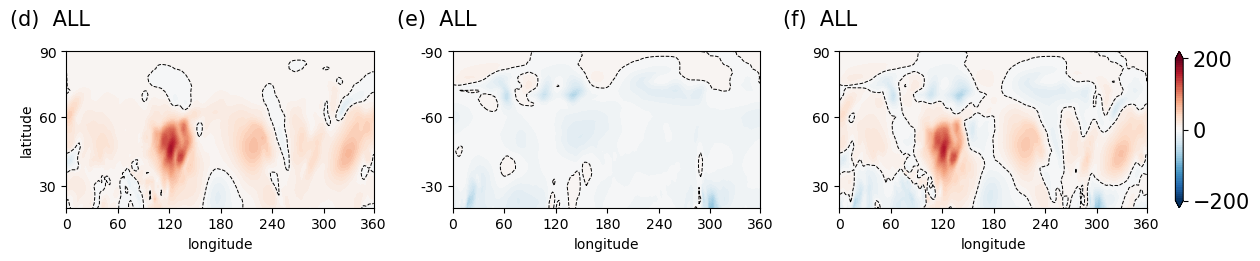

In [15]:
fig,ax = plot.subplots(1,3,figsize=(12.5,2.5),constrained_layout=True)#,projection=ccrs.PlateCarree())
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-160,165,5)
cll = np.arange(-5,6,2)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0].set_xticks(xxx)
ax[0].set_xticklabels(xx)
ax[0].set_yticks(yyy)
ax[0].set_yticklabels(yy)
ax[0].set_xlabel('longitude')
ax[0].set_ylabel('latitude')
ax[0].text(-35,53,'(d)  ALL')
#ax[0].text(55,60,' NH')
ax[0].set_ylim(11,47)


p1=ax[0].contourf(x,y,vtvre[0,48:96,:],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vplre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
#p1=ax[0].contour(x,y,vtvre[48:96,:],levels=cll,colors='white',linewidths=0.7)
p1=ax[0].contour(x,y,vtvre[0,48:96,:],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[1].set_xticks(xxx)
ax[1].set_xticklabels(xx)
ax[1].set_yticks(yyy)
ax[1].set_yticklabels(yy)
ax[1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[1].text(-35,53,'(e)  ALL')
#ax[1].text(55,60,'SH')
ax[1].set_ylim(11,47)

p2=ax[1].contourf(x,y,vtv[0,48:96,:],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
#p2=ax[1].contour(x,y,vtv[48:96,:],levels=cll,colors='white',linewidths=0.7)
p2=ax[1].contour(x,y,vtv[0,48:96,:],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[2].set_xticks(xxx)
ax[2].set_xticklabels(xx)
ax[2].set_yticks(yyy)
ax[2].set_yticklabels(yy)
ax[2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[2].text(-35,53,'(f)  ALL')
#ax[2].text(55,60,'NH - SH')
ax[2].set_ylim(11,47)

p2=ax[2].contourf(x,y,vtv[0,48:96,:]+vtvre[0,48:96,:],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p2,ax=ax[2],ticks=[-200,0,200])
#plot.colorbar(p2)#,ax=ax.ravel().tolist())#,shrink=0.8)
#cbar.ax.set_yticklabels(['-1e10', '0', '1e10']) 
#p2=ax[2].contour(x,y,-vtv[48:96,:]+vtvre[48:96,:],levels=cll,colors='white',linewidths=0.7)
p2=ax[2].contour(x,y,vtv[0,48:96,:]+vtvre[0,48:96,:],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')




plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/vt_v_MJ_m^2_ssw_ns.png',dpi=600,bbox_inches='tight') 


/tmp/ipykernel_39842/3301170169.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plot.cm.get_cmap('RdBu')


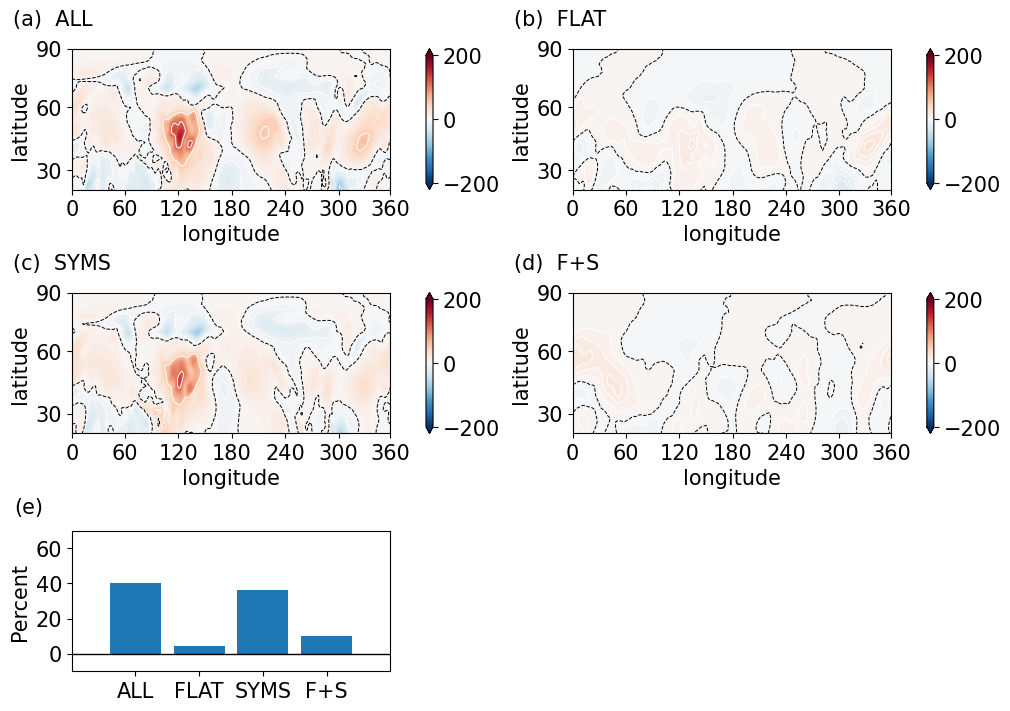

In [16]:
fig,ax = plot.subplots(3,2,figsize=(10,7),constrained_layout=True)
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-160,165,5)
cll = np.arange(-160,160,50)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0,0].set_xticks(xxx)
ax[0,0].set_xticklabels(xx)
ax[0,0].set_yticks(yyy)
ax[0,0].set_yticklabels(yy)
ax[0,0].set_xlabel('longitude')
ax[0,0].set_ylabel('latitude')
ax[0,0].text(-35,53,'(a)  ALL')
ax[0,0].set_ylim(11,47)

p1=ax[0,0].contourf(x,y,vtv[0,48:96,:]+vtvre[0,48:96,:],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p1,ax=ax[0,0],ticks=[-200,0,200])
#cbar.ax.set_yticklabels([r'$-1e^{10}$', '0', r'$1e^{10}$']) 
p1=ax[0,0].contour(x,y,vtv[0,48:96,:]+vtvre[0,48:96,:],levels=cll,colors='white',linewidths=0.7)
p1=ax[0,0].contour(x,y,vtv[0,48:96,:]+vtvre[0,48:96,:],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')



ax[0,1].set_xticks(xxx)
ax[0,1].set_xticklabels(xx)
ax[0,1].set_yticks(yyy)
ax[0,1].set_yticklabels(yy)
ax[0,1].set_xlabel('longitude')
ax[0,1].set_ylabel('latitude')
ax[0,1].text(-35,53,'(b)  FLAT')
ax[0,1].set_ylim(11,47)

p2=ax[0,1].contourf(x,y,vtv[1,48:96,:]+vtvre[1,48:96,:],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p2,ax=ax[0,1],ticks=[-200,0,200])
#cbar.ax.set_yticklabels([r'$-1e^{10}$', '0', r'$1e^{10}$']) 
p2=ax[0,1].contour(x,y,vtv[1,48:96,:]+vtvre[1,48:96,:],levels=cl,colors='white',linewidths=0.7)
p2=ax[0,1].contour(x,y,vtv[1,48:96,:]+vtvre[1,48:96,:],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')



ax[1,0].set_xticks(xxx)
ax[1,0].set_xticklabels(xx)
ax[1,0].set_yticks(yyy)
ax[1,0].set_yticklabels(yy)
ax[1,0].set_xlabel('longitude')
ax[1,0].set_ylabel('latitude')
ax[1,0].text(-35,53,'(c)  SYMS')
ax[1,0].set_ylim(11,47)

p3=ax[1,0].contourf(x,y,vtv[2,48:96,:]+vtvre[2,48:96,:],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p3,ax=ax[1,0],ticks=[-200,0,200])
#cbar.ax.set_yticklabels([r'$-1e^{10}$', '0', r'$1e^{10}$']) 
p3=ax[1,0].contour(x,y,vtv[2,48:96,:]+vtvre[2,48:96,:],levels=cll,colors='white',linewidths=0.7)
p3=ax[1,0].contour(x,y,vtv[2,48:96,:]+vtvre[2,48:96,:],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')



ax[1,1].set_xticks(xxx)
ax[1,1].set_xticklabels(xx)
ax[1,1].set_yticks(yyy)
ax[1,1].set_yticklabels(yy)
ax[1,1].set_xlabel('longitude')
ax[1,1].set_ylabel('latitude')
ax[1,1].text(-35,53,'(d)  F+S')
ax[1,1].set_ylim(11,47)

p4=ax[1,1].contourf(x,y,vtv[3,48:96,:]+vtvre[3,48:96,:],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p4,ax=ax[1,1],ticks=[-200,0,200])
#cbar.ax.set_yticklabels([r'$-1e^{10}$', '0', r'$1e^{10}$']) 
p4=ax[1,1].contour(x,y,vtv[3,48:96,:]+vtvre[3,48:96,:],levels=cl,colors='white',linewidths=0.7)
p4=ax[1,1].contour(x,y,vtv[3,48:96,:]+vtvre[3,48:96,:],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')



barplot=np.zeros((4))
barplot[0] = (np.mean(np.mean(vtv[0,59:96,:],axis=0),axis=0)+np.mean(np.mean((vtvre[0,59:96,:]),axis=0),axis=0))/np.mean(np.mean((vtvre[0,59:96,:]),axis=0),axis=0)*100
barplot[1] = (np.mean(np.mean(vtv[1,59:96,:],axis=0),axis=0)+np.mean(np.mean((vtvre[1,59:96,:]),axis=0),axis=0))/np.mean(np.mean((vtvre[0,59:96,:]),axis=0),axis=0)*100
barplot[2] = (np.mean(np.mean(vtv[2,59:96,:],axis=0),axis=0)+np.mean(np.mean((vtvre[2,59:96,:]),axis=0),axis=0))/np.mean(np.mean((vtvre[0,59:96,:]),axis=0),axis=0)*100
barplot[3] = (np.mean(np.mean(vtv[3,59:96,:],axis=0),axis=0)+np.mean(np.mean((vtvre[3,59:96,:]),axis=0),axis=0))/np.mean(np.mean((vtvre[0,59:96,:]),axis=0),axis=0)*100


name_list = ['ALL','FLAT','SYMS','F+S']
ax[2,0].bar(range(len(barplot)),barplot,tick_label = name_list)
ax[2,0].set_xlim(-1,4)
ax[2,0].set_ylim(-10,70)
ax[2,0].set_yticks([0,20,40,60])
ax[2,0].set_yticklabels([0,20,40,60])
ax[2,0].set_ylabel('Percent') 
ax[2,0].text(-1.9,80,'(e)')
ax[2,0].axhline(y=0,color='black',linewidth='1')

ax[2,1].axis('off')


plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/vt_v_MJ_m^2_ssw.png',dpi=600,bbox_inches='tight') 



In [17]:
ncin1 = Dataset('/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/t/era5_t_1979_04.daily.nc', 'r', format='NETCDF4') 
#lat = ncin1.variables['lat'] 
#lat = (np.array(lat))
# t = ncin1.variables['t'] 
# t = (np.array(t))
level = ncin1.variables['level'] 
level = (np.array(level))
print(level)

filename1 = '/project2/tas1/ockham/data11/tas/echam-aiv_rcc_6.1.00p1/echr0028/ATM_6h_pl_echr0028_103001.nc'
ncin1 = Dataset(filename1, 'r', format='NETCDF4') 
lat = ncin1.variables['lat'] 
lat = (np.array(lat))


zz = np.zeros(37)

zz = -np.log(level/1000)*7000


vy = np.zeros((12,37,96,192,44))
ty = np.zeros((12,37,96,192,44))

for yr in range(1979,2023):
    print(yr)
    ncin1 = Dataset('/home/smliu01/scratch-midway2/ssw/era5/'+str(yr)+'.nc', 'r', format='NETCDF4')
    t = ncin1.variables['t']
    t = (np.array(t))
    v = ncin1.variables['v'] 
    v = (np.array(v))
    
    vy[:,:,:,:,yr-1979] = v
    ty[:,:,:,:,yr-1979] = t

    
vt=np.zeros((37,96,192))
vtre=np.zeros((37,96,192))

vv = np.zeros((5,37,96,192,43))
tt = np.zeros((5,37,96,192,43))

for i in range(43):
    vv[0:2,:,0:48,:,i] = vy[10:12,:,0:48,:,i]
    vv[2:5,:,0:48,:,i] = vy[0:3,:,0:48,:,i+1]
    tt[0:2,:,0:48,:,i] = ty[10:12,:,0:48,:,i]
    tt[2:5,:,0:48,:,i] = ty[0:3,:,0:48,:,i+1]
for i in range(43):
    vv[:,:,48:96,:,i] = vy[4:9,:,48:96,:,i]
    tt[:,:,48:96,:,i] = ty[4:9,:,48:96,:,i]

vvv = np.zeros((5,37,96,192,43))
ttt = np.zeros((5,37,96,192,43))
    
for i in range(192):
    vvv[:,:,:,i,:] = vv[:,:,:,i,:]-np.mean(vv,axis=3)
    ttt[:,:,:,i,:] = tt[:,:,:,i,:]-np.mean(tt,axis=3)

vt[:,:,:] = np.mean(np.mean(vvv*ttt,axis=4),axis=0)
vtre=vt[:,::-1,:]


vtv_era = np.zeros((96,192))
vtvre_era = np.zeros((96,192))

for i in range(37):
    vtv_era[:,:] = vtv_era[:,:] + vt[i,:,:]*np.exp(-zz[i]/7000)
    
vtvre_era=vtv_era[::-1,:]


for l in range(96):
    vtv_era[l,:] = vtv_era[l,:]*np.cos(abs(lat[l])*np.pi/180)
    vtvre_era[l,:] = vtvre_era[l,:]*np.cos(abs(lat[l])*np.pi/180)
    


[   1.    2.    3.    5.    7.   10.   20.   30.   50.   70.  100.  125.
  150.  175.  200.  225.  250.  300.  350.  400.  450.  500.  550.  600.
  650.  700.  750.  775.  800.  825.  850.  875.  900.  925.  950.  975.
 1000.]
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


In [18]:
filename2 = 'fig3_era5.nc'

ncin2 = Dataset(filename2, 'w', format='NETCDF4')

#days = np.arange(1,366, 1.0)
#years = np.arange(1,30, 1.0)
#ss = ncin2.createDimension('simu', 37)
lat = ncin2.createDimension('days', 96)
lon = ncin2.createDimension('years', 192)

uwind = ncin2.createVariable('vtv_era', 'f4', ('days', 'years'))

uwind[:] = vtv_era

vwind = ncin2.createVariable('vtvre_era', 'f4', ('days', 'years'))

vwind[:] = vtvre_era
ncin2.close()

In [19]:
ncin1 = Dataset('fig3_data.nc', 'r', format='NETCDF4') 
vtv = ncin1.variables['vtv'] 
vtv = (np.array(vtv))
vtvre = ncin1.variables['vtvre'] 
vtvre = (np.array(vtvre))


ncin1 = Dataset('fig3_era5.nc', 'r', format='NETCDF4') 
vtv_era = ncin1.variables['vtv_era'] 
vtv_era = (np.array(vtv_era))
vtvre_era = ncin1.variables['vtvre_era'] 
vtvre_era = (np.array(vtvre_era))

/tmp/ipykernel_39842/866207483.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plot.cm.get_cmap('RdBu')


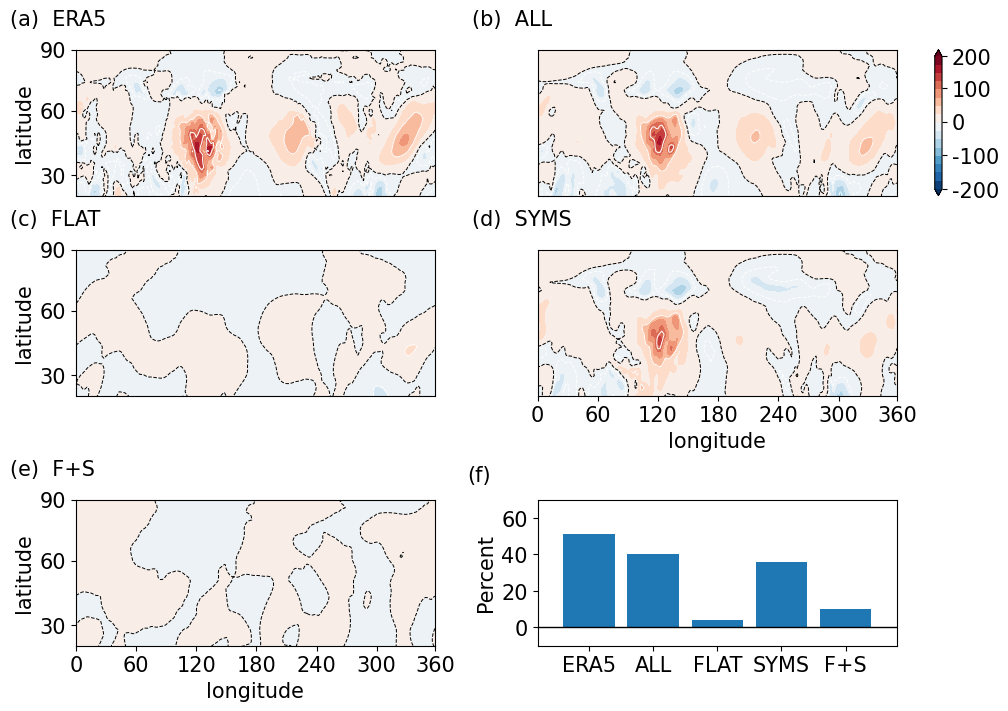

In [51]:
fig,ax = plot.subplots(3,2,figsize=(10,7),constrained_layout=True)
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-160,180,20)
cll = np.arange(-160,160,50)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0,1].set_xticks([ ])
ax[0,1].set_xticklabels([ ])
ax[0,1].set_yticks([ ])
ax[0,1].set_yticklabels([ ])
#ax[0,1].set_xlabel('longitude')
#ax[0,1].set_ylabel('latitude')
ax[0,1].text(-35,53,'(b)  ALL')
ax[0,1].set_ylim(11,47)


p1=ax[0,1].contourf(x,y,vtv[0,48:96,:]+vtvre[0,48:96,:],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p1,ax=ax[0,0],ticks=[-200,0,200])
#cbar.ax.set_yticklabels([r'$-1e^{10}$', '0', r'$1e^{10}$']) 
p1=ax[0,1].contour(x,y,vtv[0,48:96,:]+vtvre[0,48:96,:],levels=cll,colors='white',linewidths=0.7)
p1=ax[0,1].contour(x,y,vtv[0,48:96,:]+vtvre[0,48:96,:],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')



ax[1,0].set_xticks([])
ax[1,0].set_xticklabels([])
ax[1,0].set_yticks(yyy)
ax[1,0].set_yticklabels(yy)
# ax[1,0].set_xlabel('longitude')
ax[1,0].set_ylabel('latitude')
ax[1,0].text(-35,53,'(c)  FLAT')
ax[1,0].set_ylim(11,47)

p2=ax[1,0].contourf(x,y,vtv[1,48:96,:]+vtvre[1,48:96,:],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[0,1],ticks=[-200,0,200])
#cbar.ax.set_yticklabels([r'$-1e^{10}$', '0', r'$1e^{10}$']) 
p2=ax[1,0].contour(x,y,vtv[1,48:96,:]+vtvre[1,48:96,:],levels=cl,colors='white',linewidths=0.7)
p2=ax[1,0].contour(x,y,vtv[1,48:96,:]+vtvre[1,48:96,:],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')



ax[1,1].set_xticks(xxx)
ax[1,1].set_xticklabels(xx)
ax[1,1].set_yticks([])
ax[1,1].set_yticklabels([])
ax[1,1].set_xlabel('longitude')
#ax[1,1].set_ylabel('latitude')
ax[1,1].text(-35,53,'(d)  SYMS')
ax[1,1].set_ylim(11,47)

p3=ax[1,1].contourf(x,y,vtv[2,48:96,:]+vtvre[2,48:96,:],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p3,ax=ax[1,0],ticks=[-200,0,200])
#cbar.ax.set_yticklabels([r'$-1e^{10}$', '0', r'$1e^{10}$']) 
p3=ax[1,1].contour(x,y,vtv[2,48:96,:]+vtvre[2,48:96,:],levels=cll,colors='white',linewidths=0.7)
p3=ax[1,1].contour(x,y,vtv[2,48:96,:]+vtvre[2,48:96,:],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')



ax[2,0].set_xticks(xxx)
ax[2,0].set_xticklabels(xx)
ax[2,0].set_yticks(yyy)
ax[2,0].set_yticklabels(yy)
ax[2,0].set_xlabel('longitude')
ax[2,0].set_ylabel('latitude')
ax[2,0].text(-35,53,'(e)  F+S')
ax[2,0].set_ylim(11,47)

p4=ax[2,0].contourf(x,y,vtv[3,48:96,:]+vtvre[3,48:96,:],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p4,ax=ax[0,1])#,ticks=[-200,-100,0,100,200])
cbar.set_ticks(np.linspace(-160,165,5))  # Set new ticks for colorbar
cbar.set_ticklabels([str(int(tick)) for tick in np.linspace(-200,200,5)])  # Set new labels for colorbar ticks
#cbar.ax.set_yticklabels([r'$-1e^{10}$', '0', r'$1e^{10}$']) 
p4=ax[2,0].contour(x,y,vtv[3,48:96,:]+vtvre[3,48:96,:],levels=cl,colors='white',linewidths=0.7)
p4=ax[2,0].contour(x,y,vtv[3,48:96,:]+vtvre[3,48:96,:],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

ax[0,0].set_xticks([])
ax[0,0].set_xticklabels([])
ax[0,0].set_yticks(yyy)
ax[0,0].set_yticklabels(yy)
# ax[0,0].set_xlabel('longitude')
ax[0,0].set_ylabel('latitude')
ax[0,0].text(-35,53,'(a)  ERA5')
ax[0,0].set_ylim(11,47)

factor=2.5

p4=ax[0,0].contourf(x,y,(vtv_era[48:96,:]+vtvre_era[48:96,:])/factor,cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p4,ax=ax[2,0],ticks=[-200,0,200])
#cbar.ax.set_yticklabels([r'$-1e^{10}$', '0', r'$1e^{10}$']) 
p4=ax[0,0].contour(x,y,(vtv_era[48:96,:]+vtvre_era[48:96,:])/factor,levels=cll,colors='white',linewidths=0.7)
p4=ax[0,0].contour(x,y,(vtv_era[48:96,:]+vtvre_era[48:96,:])/factor,levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


barplot=np.zeros((5))
barplot[0] = (np.mean(np.mean(vtv_era[59:96,:],axis=0),axis=0)+np.mean(np.mean((vtvre_era[59:96,:]),axis=0),axis=0))/np.mean(np.mean((vtvre_era[59:96,:]),axis=0),axis=0)*100
barplot[1] = (np.mean(np.mean(vtv[0,59:96,:],axis=0),axis=0)+np.mean(np.mean((vtvre[0,59:96,:]),axis=0),axis=0))/np.mean(np.mean((vtvre[0,59:96,:]),axis=0),axis=0)*100
barplot[2] = (np.mean(np.mean(vtv[1,59:96,:],axis=0),axis=0)+np.mean(np.mean((vtvre[1,59:96,:]),axis=0),axis=0))/np.mean(np.mean((vtvre[0,59:96,:]),axis=0),axis=0)*100
barplot[3] = (np.mean(np.mean(vtv[2,59:96,:],axis=0),axis=0)+np.mean(np.mean((vtvre[2,59:96,:]),axis=0),axis=0))/np.mean(np.mean((vtvre[0,59:96,:]),axis=0),axis=0)*100
barplot[4] = (np.mean(np.mean(vtv[3,59:96,:],axis=0),axis=0)+np.mean(np.mean((vtvre[3,59:96,:]),axis=0),axis=0))/np.mean(np.mean((vtvre[0,59:96,:]),axis=0),axis=0)*100


name_list = ['ERA5','ALL','FLAT','SYMS','F+S']
ax[2,1].bar(range(len(barplot)),barplot,tick_label = name_list)
ax[2,1].set_xlim(-0.8,4.8)
ax[2,1].set_ylim(-10,70)
ax[2,1].set_yticks([0,20,40,60])
ax[2,1].set_yticklabels([0,20,40,60])
ax[2,1].set_ylabel('Percent') 
ax[2,1].text(-1.9,80,'(f)')
ax[2,1].axhline(y=0,color='black',linewidth='1')

#ax[2,1].axis('off')

plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/vt_v_MJ_m^2_ssw_new.png',dpi=600,bbox_inches='tight') 



In [21]:
barplot[1]

40.0203675031662

In [48]:
print(np.mean(np.mean((vtv[0,59:96,:]),axis=0),axis=0))
print(np.mean(np.mean((vtvre[0,59:96,:]),axis=0),axis=0))
print(np.mean(np.mean((vtv[1,59:96,:]),axis=0),axis=0))
print(np.mean(np.mean((vtvre[1,59:96,:]),axis=0),axis=0))

-5.915891668534819
9.863167314946276
-5.254753201238724
5.676326575731601


(192, 96)


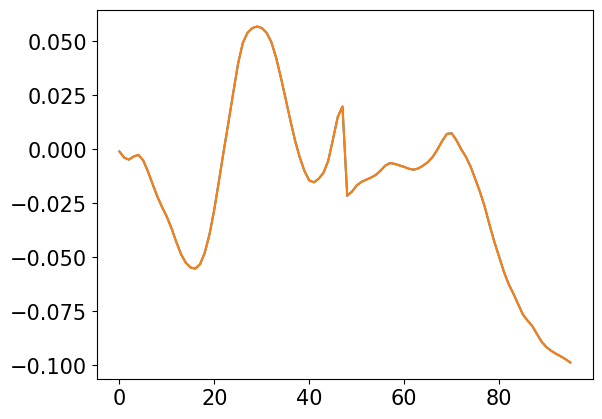

In [146]:
#plot.plot(np.mean(np.mean(np.mean(vvv,axis=3),axis=2),axis=0))
#plot.plot(np.mean(vpl[0,:,:],axis=1))
yop=np.mean(np.mean(vvv,axis=3),axis=2)
print(yop.shape)
#plot.plot(yop[:,0])
plot.plot(np.mean(yop[0:191,:],axis=0))
plot.plot(np.mean(vpl[1,:,0:191],axis=1))
#plot.plot(yop[100,:],)
#plot.plot(vpl[0,:,100])
#plot.plot(np.mean(np.mean(np.mean(vv,axis=0),axis=1),axis=1))

In [15]:
for l in range(96):
    vpl[:,l,:,:] = vpl[:,l,:,:]*np.cos(abs(lat[l])*np.pi/180)
    tpl[:,l,:,:] = tpl[:,l,:,:]*np.cos(abs(lat[l])*np.pi/180)
    vt[:,l,:,:] = vt[:,l,:,:]*np.cos(abs(lat[l])*np.pi/180)
    vplre[:,l,:,:] = vplre[:,l,:,:]*np.cos(abs(lat[l])*np.pi/180)
    tplre[:,l,:,:] = tplre[:,l,:,:]*np.cos(abs(lat[l])*np.pi/180)
    vtre[:,l,:,:] = vtre[:,l,:,:]*np.cos(abs(lat[l])*np.pi/180)

/tmp/ipykernel_28423/1450528208.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plot.cm.get_cmap('RdBu')


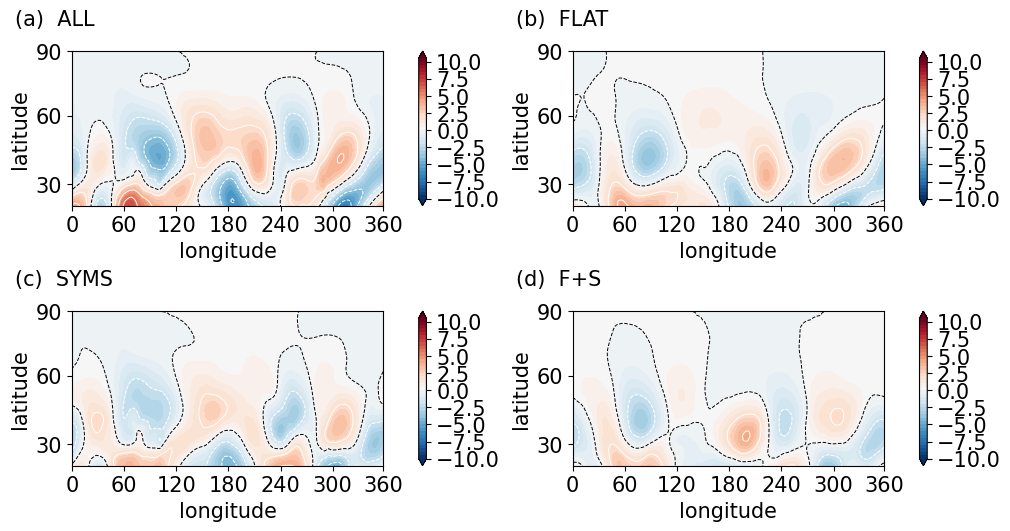

In [11]:
fig,ax = plot.subplots(2,2,figsize=(10,5.2),constrained_layout=True)
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-10,11,0.5)
cl1 = np.arange(-10,12,2)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0,0].set_xticks(xxx)
ax[0,0].set_xticklabels(xx)
ax[0,0].set_yticks(yyy)
ax[0,0].set_yticklabels(yy)
ax[0,0].set_xlabel('longitude')
ax[0,0].set_ylabel('latitude')
ax[0,0].text(-35,53,'(a)  ALL')
ax[0,0].set_ylim(11,47)

p1=ax[0,0].contourf(x,y,-vpl[0,48:96,:,8]+vplre[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p1,ax=ax[0,0])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[0,0].contour(x,y,-vpl[0,48:96,:,8]+vplre[0,48:96,:,8],levels=cl1,colors='white',linewidths=0.7)
p1=ax[0,0].contour(x,y,-vpl[0,48:96,:,8]+vplre[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')



ax[0,1].set_xticks(xxx)
ax[0,1].set_xticklabels(xx)
ax[0,1].set_yticks(yyy)
ax[0,1].set_yticklabels(yy)
ax[0,1].set_xlabel('longitude')
ax[0,1].set_ylabel('latitude')
ax[0,1].text(-35,53,'(b)  FLAT')
ax[0,1].set_ylim(11,47)

p2=ax[0,1].contourf(x,y,-vpl[1,48:96,:,8]+vplre[1,48:96,:,8],cmap=reversed_ma,levels=cl,extend='both')
cbar=plot.colorbar(p2,ax=ax[0,1])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[0,1].contour(x,y,-vpl[1,48:96,:,8]+vplre[1,48:96,:,8],levels=cl1,colors='white',linewidths=0.7)
p2=ax[0,1].contour(x,y,-vpl[1,48:96,:,8]+vplre[1,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')



ax[1,0].set_xticks(xxx)
ax[1,0].set_xticklabels(xx)
ax[1,0].set_yticks(yyy)
ax[1,0].set_yticklabels(yy)
ax[1,0].set_xlabel('longitude')
ax[1,0].set_ylabel('latitude')
ax[1,0].text(-35,53,'(c)  SYMS')
ax[1,0].set_ylim(11,47)

p3=ax[1,0].contourf(x,y,-vpl[2,48:96,:,8]+vplre[2,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p3,ax=ax[1,0])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p3=ax[1,0].contour(x,y,-vpl[2,48:96,:,8]+vplre[2,48:96,:,8],levels=cl1,colors='white',linewidths=0.7)
p3=ax[1,0].contour(x,y,-vpl[2,48:96,:,8]+vplre[2,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')



ax[1,1].set_xticks(xxx)
ax[1,1].set_xticklabels(xx)
ax[1,1].set_yticks(yyy)
ax[1,1].set_yticklabels(yy)
ax[1,1].set_xlabel('longitude')
ax[1,1].set_ylabel('latitude')
ax[1,1].text(-35,53,'(d)  F+S')
ax[1,1].set_ylim(11,47)

p4=ax[1,1].contourf(x,y,-vpl[3,48:96,:,8]+vplre[3,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p4,ax=ax[1,1])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p4=ax[1,1].contour(x,y,-vpl[3,48:96,:,8]+vplre[3,48:96,:,8],levels=cl1,colors='white',linewidths=0.7)
p4=ax[1,1].contour(x,y,-vpl[3,48:96,:,8]+vplre[3,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


barplot=np.zeros((4))
barplot[0] = (-np.mean(np.mean(vpl[0,59:96,0:191,8],axis=0),axis=0)+np.mean(np.mean((vplre[0,59:96,0:191,8]),axis=0),axis=0))/np.mean(np.mean((vplre[0,59:96,0:191,8]),axis=0),axis=0)*100
barplot[1] = (-np.mean(np.mean(vpl[1,59:96,0:191,8],axis=0),axis=0)+np.mean(np.mean((vplre[1,59:96,0:191,8]),axis=0),axis=0))/np.mean(np.mean((vplre[1,59:96,0:191,8]),axis=0),axis=0)*100
barplot[2] = (-np.mean(np.mean(vpl[2,59:96,0:191,8],axis=0),axis=0)+np.mean(np.mean((vplre[2,59:96,0:191,8]),axis=0),axis=0))/np.mean(np.mean((vplre[2,59:96,0:191,8]),axis=0),axis=0)*100
barplot[3] = (-np.mean(np.mean(vpl[3,59:96,0:191,8],axis=0),axis=0)+np.mean(np.mean((vplre[3,59:96,0:191,8]),axis=0),axis=0))/np.mean(np.mean((vplre[3,59:96,0:191,8]),axis=0),axis=0)*100



# name_list = ['ALL','FLAT','SYMS','F+S']
# ax[2,0].bar(range(len(barplot)),barplot,tick_label = name_list)
# ax[2,0].set_xlim(-1,4)
# ax[2,0].set_ylim(-80,80)
# ax[2,0].set_yticks([-20,-10,0,10,20,30,40])
# ax[2,0].set_yticklabels([-20,-10,0,10,20,30,40])
# ax[2,0].set_ylabel('Percent') 
# ax[2,0].text(-1.9,45,'(e)')
# ax[2,0].axhline(y=0,color='black',linewidth='1')

#ax[2,1].axis('off')
#ax[2,0].axis('off')

plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/vpl_v_MJ_m^2_ssw_300.png',dpi=600,bbox_inches='tight') 



In [227]:
np.mean(np.mean(vplre[0,59:96,0:191],axis=0),axis=0)

0.02863494182622691

In [226]:
np.mean(vpl[0,59:96,0:191])

0.028634941826227143

In [172]:
np.mean(np.mean((vplre[1,59:96,0:191]),axis=0),axis=0)

-0.0008770956692511207

/tmp/ipykernel_28423/2688031111.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plot.cm.get_cmap('RdBu')


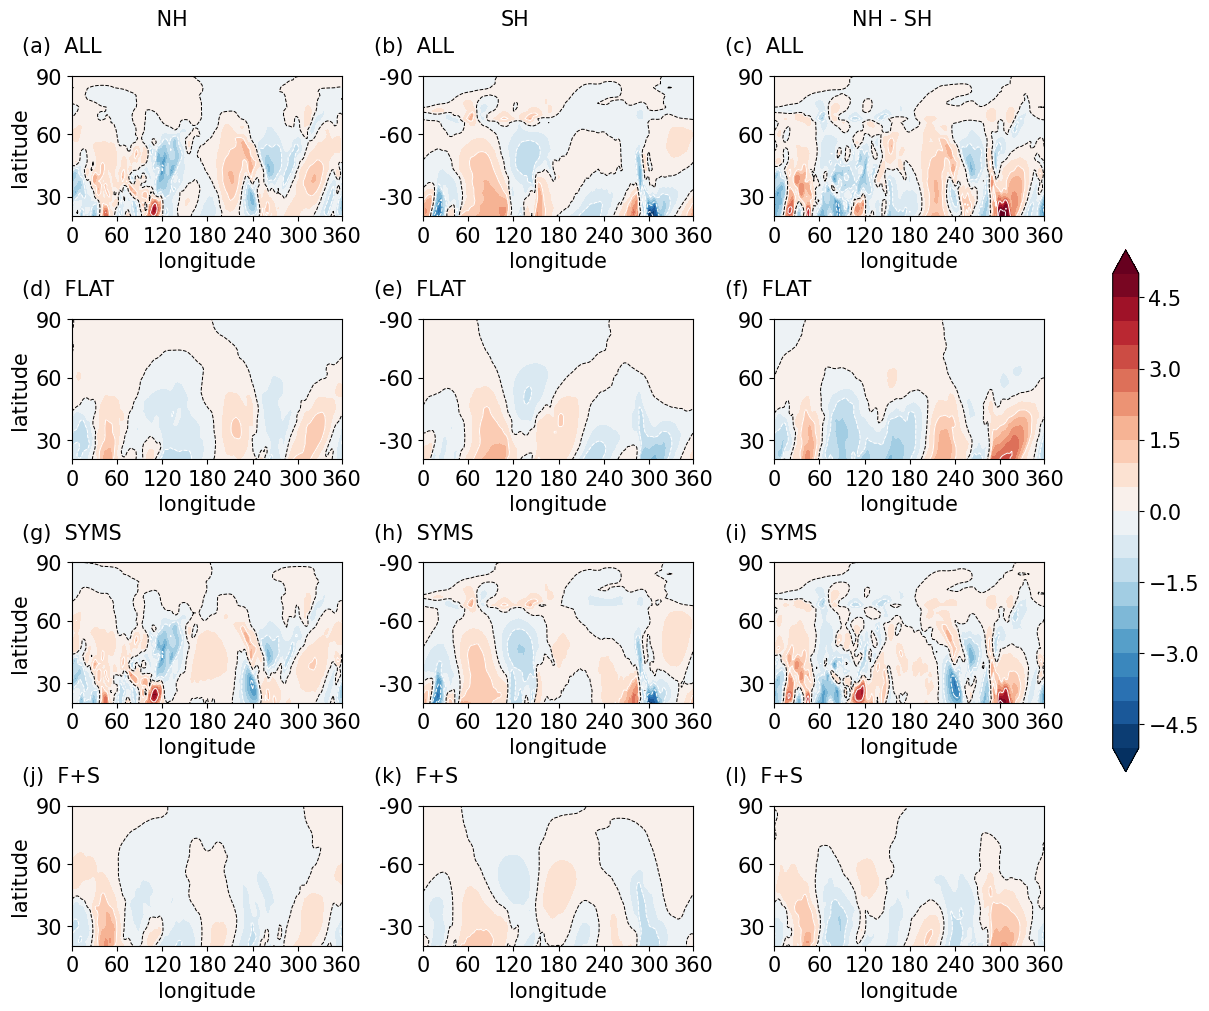

In [61]:
fig,ax = plot.subplots(4,3,figsize=(12,10),constrained_layout=True)#,projection=ccrs.PlateCarree())
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-5,5.5,0.5)
cll = np.arange(-5,6,2)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0,0].set_xticks(xxx)
ax[0,0].set_xticklabels(xx)
ax[0,0].set_yticks(yyy)
ax[0,0].set_yticklabels(yy)
ax[0,0].set_xlabel('longitude')
ax[0,0].set_ylabel('latitude')
ax[0,0].text(-35,53,'(a)  ALL')
ax[0,0].text(55,60,' NH')
ax[0,0].set_ylim(11,47)


p1=ax[0,0].contourf(x,y,vplre[0,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vplre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[0,0].contour(x,y,vplre[0,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p1=ax[0,0].contour(x,y,vplre[0,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[0,1].set_xticks(xxx)
ax[0,1].set_xticklabels(xx)
ax[0,1].set_yticks(yyy)
ax[0,1].set_yticklabels(yy)
ax[0,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[0,1].text(-35,53,'(b)  ALL')
ax[0,1].text(55,60,'SH')
ax[0,1].set_ylim(11,47)

p2=ax[0,1].contourf(x,y,vpl[0,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[0,1].contour(x,y,vpl[0,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[0,1].contour(x,y,vpl[0,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[0,2].set_xticks(xxx)
ax[0,2].set_xticklabels(xx)
ax[0,2].set_yticks(yyy)
ax[0,2].set_yticklabels(yy)
ax[0,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[0,2].text(-35,53,'(c)  ALL')
ax[0,2].text(55,60,'NH - SH')
ax[0,2].set_ylim(11,47)

p2=ax[0,2].contourf(x,y,-vpl[0,48:96,:,2]+vplre[0,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
plot.colorbar(p2,ax=ax.ravel().tolist(),shrink=0.6)
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[0,2].contour(x,y,-vpl[0,48:96,:,2]+vplre[0,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[0,2].contour(x,y,-vpl[0,48:96,:,2]+vplre[0,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')




ax[1,0].set_xticks(xxx)
ax[1,0].set_xticklabels(xx)
ax[1,0].set_yticks(yyy)
ax[1,0].set_yticklabels(yy)
ax[1,0].set_xlabel('longitude')
ax[1,0].set_ylabel('latitude')
ax[1,0].text(-35,53,'(d)  FLAT')
ax[1,0].set_ylim(11,47)


p1=ax[1,0].contourf(x,y,vplre[1,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vplre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[1,0].contour(x,y,vplre[1,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p1=ax[1,0].contour(x,y,vplre[1,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[1,1].set_xticks(xxx)
ax[1,1].set_xticklabels(xx)
ax[1,1].set_yticks(yyy)
ax[1,1].set_yticklabels(yy)
ax[1,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[1,1].text(-35,53,'(e)  FLAT')
ax[1,1].set_ylim(11,47)

p2=ax[1,1].contourf(x,y,vpl[1,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1,1].contour(x,y,vpl[1,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[1,1].contour(x,y,vpl[1,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[1,2].set_xticks(xxx)
ax[1,2].set_xticklabels(xx)
ax[1,2].set_yticks(yyy)
ax[1,2].set_yticklabels(yy)
ax[1,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[1,2].text(-35,53,'(f)  FLAT')
ax[1,2].set_ylim(11,47)

p2=ax[1,2].contourf(x,y,-vpl[1,48:96,:,2]+vplre[1,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1,2].contour(x,y,-vpl[1,48:96,:,2]+vplre[1,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[1,2].contour(x,y,-vpl[1,48:96,:,2]+vplre[1,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')





ax[2,0].set_xticks(xxx)
ax[2,0].set_xticklabels(xx)
ax[2,0].set_yticks(yyy)
ax[2,0].set_yticklabels(yy)
ax[2,0].set_xlabel('longitude')
ax[2,0].set_ylabel('latitude')
ax[2,0].text(-35,53,'(g)  SYMS')
ax[2,0].set_ylim(11,47)


p1=ax[2,0].contourf(x,y,vplre[2,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vplre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[2,0].contour(x,y,vplre[2,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p1=ax[2,0].contour(x,y,vplre[2,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[2,1].set_xticks(xxx)
ax[2,1].set_xticklabels(xx)
ax[2,1].set_yticks(yyy)
ax[2,1].set_yticklabels(yy)
ax[2,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[2,1].text(-35,53,'(h)  SYMS')
ax[2,1].set_ylim(11,47)

p2=ax[2,1].contourf(x,y,vpl[2,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[2,1].contour(x,y,vpl[2,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[2,1].contour(x,y,vpl[2,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[2,2].set_xticks(xxx)
ax[2,2].set_xticklabels(xx)
ax[2,2].set_yticks(yyy)
ax[2,2].set_yticklabels(yy)
ax[2,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[2,2].text(-35,53,'(i)  SYMS')
ax[2,2].set_ylim(11,47)

p2=ax[2,2].contourf(x,y,-vpl[2,48:96,:,2]+vplre[2,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[2,2].contour(x,y,-vpl[2,48:96,:,2]+vplre[2,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[2,2].contour(x,y,-vpl[2,48:96,:,2]+vplre[2,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')





ax[3,0].set_xticks(xxx)
ax[3,0].set_xticklabels(xx)
ax[3,0].set_yticks(yyy)
ax[3,0].set_yticklabels(yy)
ax[3,0].set_xlabel('longitude')
ax[3,0].set_ylabel('latitude')
ax[3,0].text(-35,53,'(j)  F+S')
ax[3,0].set_ylim(11,47)


p1=ax[3,0].contourf(x,y,vplre[3,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vplre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[3,0].contour(x,y,vplre[3,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p1=ax[3,0].contour(x,y,vplre[3,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[3,1].set_xticks(xxx)
ax[3,1].set_xticklabels(xx)
ax[3,1].set_yticks(yyy)
ax[3,1].set_yticklabels(yy)
ax[3,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[3,1].text(-35,53,'(k)  F+S')
ax[3,1].set_ylim(11,47)

p2=ax[3,1].contourf(x,y,vpl[3,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[3,1].contour(x,y,vpl[3,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[3,1].contour(x,y,vpl[3,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[3,2].set_xticks(xxx)
ax[3,2].set_xticklabels(xx)
ax[3,2].set_yticks(yyy)
ax[3,2].set_yticklabels(yy)
ax[3,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[3,2].text(-35,53,'(l)  F+S')
ax[3,2].set_ylim(11,47)

p2=ax[3,2].contourf(x,y,-vpl[3,48:96,:,2]+vplre[3,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[3,2].contour(x,y,-vpl[3,48:96,:,2]+vplre[3,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[3,2].contour(x,y,-vpl[3,48:96,:,2]+vplre[3,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')




plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/vpl_v_MJ_m^2_ssw_ns_850.png',dpi=600,bbox_inches='tight') 


/tmp/ipykernel_28423/3588080455.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plot.cm.get_cmap('RdBu')


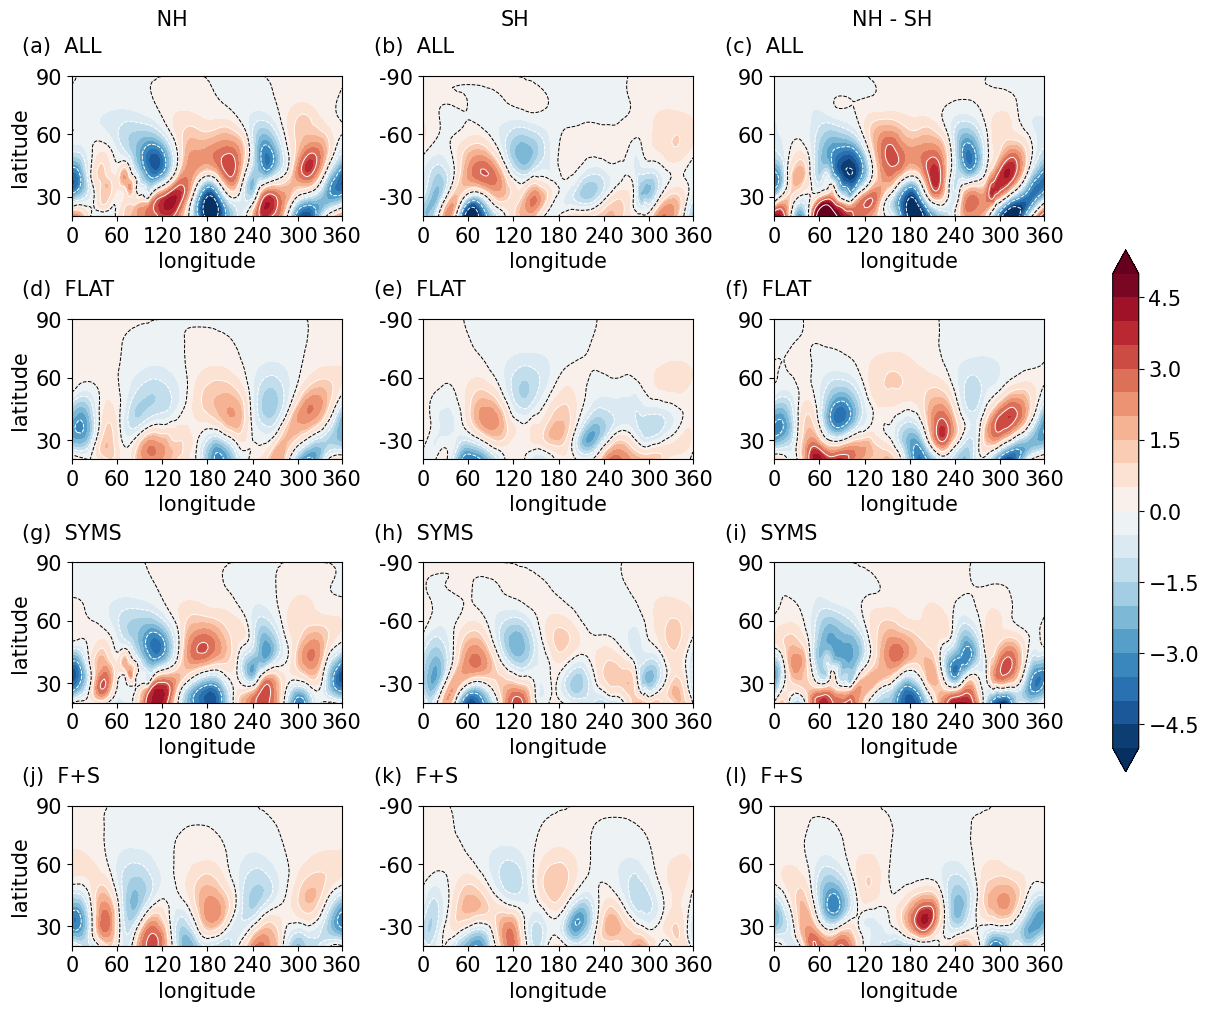

In [59]:
fig,ax = plot.subplots(4,3,figsize=(12,10),constrained_layout=True)#,projection=ccrs.PlateCarree())
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-5,5.5,0.5)
cll = np.arange(-5,6,2)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0,0].set_xticks(xxx)
ax[0,0].set_xticklabels(xx)
ax[0,0].set_yticks(yyy)
ax[0,0].set_yticklabels(yy)
ax[0,0].set_xlabel('longitude')
ax[0,0].set_ylabel('latitude')
ax[0,0].text(-35,53,'(a)  ALL')
ax[0,0].text(55,60,' NH')
ax[0,0].set_ylim(11,47)


p1=ax[0,0].contourf(x,y,vplre[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vplre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[0,0].contour(x,y,vplre[0,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p1=ax[0,0].contour(x,y,vplre[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[0,1].set_xticks(xxx)
ax[0,1].set_xticklabels(xx)
ax[0,1].set_yticks(yyy)
ax[0,1].set_yticklabels(yy)
ax[0,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[0,1].text(-35,53,'(b)  ALL')
ax[0,1].text(55,60,'SH')
ax[0,1].set_ylim(11,47)

p2=ax[0,1].contourf(x,y,vpl[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[0,1].contour(x,y,vpl[0,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[0,1].contour(x,y,vpl[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[0,2].set_xticks(xxx)
ax[0,2].set_xticklabels(xx)
ax[0,2].set_yticks(yyy)
ax[0,2].set_yticklabels(yy)
ax[0,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[0,2].text(-35,53,'(c)  ALL')
ax[0,2].text(55,60,'NH - SH')
ax[0,2].set_ylim(11,47)

p2=ax[0,2].contourf(x,y,-vpl[0,48:96,:,8]+vplre[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
plot.colorbar(p2,ax=ax.ravel().tolist(),shrink=0.6)
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[0,2].contour(x,y,-vpl[0,48:96,:,8]+vplre[0,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[0,2].contour(x,y,-vpl[0,48:96,:,8]+vplre[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')




ax[1,0].set_xticks(xxx)
ax[1,0].set_xticklabels(xx)
ax[1,0].set_yticks(yyy)
ax[1,0].set_yticklabels(yy)
ax[1,0].set_xlabel('longitude')
ax[1,0].set_ylabel('latitude')
ax[1,0].text(-35,53,'(d)  FLAT')
ax[1,0].set_ylim(11,47)


p1=ax[1,0].contourf(x,y,vplre[1,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vplre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[1,0].contour(x,y,vplre[1,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p1=ax[1,0].contour(x,y,vplre[1,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[1,1].set_xticks(xxx)
ax[1,1].set_xticklabels(xx)
ax[1,1].set_yticks(yyy)
ax[1,1].set_yticklabels(yy)
ax[1,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[1,1].text(-35,53,'(e)  FLAT')
ax[1,1].set_ylim(11,47)

p2=ax[1,1].contourf(x,y,vpl[1,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1,1].contour(x,y,vpl[1,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[1,1].contour(x,y,vpl[1,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[1,2].set_xticks(xxx)
ax[1,2].set_xticklabels(xx)
ax[1,2].set_yticks(yyy)
ax[1,2].set_yticklabels(yy)
ax[1,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[1,2].text(-35,53,'(f)  FLAT')
ax[1,2].set_ylim(11,47)

p2=ax[1,2].contourf(x,y,-vpl[1,48:96,:,8]+vplre[1,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1,2].contour(x,y,-vpl[1,48:96,:,8]+vplre[1,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[1,2].contour(x,y,-vpl[1,48:96,:,8]+vplre[1,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')





ax[2,0].set_xticks(xxx)
ax[2,0].set_xticklabels(xx)
ax[2,0].set_yticks(yyy)
ax[2,0].set_yticklabels(yy)
ax[2,0].set_xlabel('longitude')
ax[2,0].set_ylabel('latitude')
ax[2,0].text(-35,53,'(g)  SYMS')
ax[2,0].set_ylim(11,47)


p1=ax[2,0].contourf(x,y,vplre[2,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vplre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[2,0].contour(x,y,vplre[2,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p1=ax[2,0].contour(x,y,vplre[2,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[2,1].set_xticks(xxx)
ax[2,1].set_xticklabels(xx)
ax[2,1].set_yticks(yyy)
ax[2,1].set_yticklabels(yy)
ax[2,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[2,1].text(-35,53,'(h)  SYMS')
ax[2,1].set_ylim(11,47)

p2=ax[2,1].contourf(x,y,vpl[2,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[2,1].contour(x,y,vpl[2,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[2,1].contour(x,y,vpl[2,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[2,2].set_xticks(xxx)
ax[2,2].set_xticklabels(xx)
ax[2,2].set_yticks(yyy)
ax[2,2].set_yticklabels(yy)
ax[2,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[2,2].text(-35,53,'(i)  SYMS')
ax[2,2].set_ylim(11,47)

p2=ax[2,2].contourf(x,y,-vpl[2,48:96,:,8]+vplre[2,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[2,2].contour(x,y,-vpl[2,48:96,:,8]+vplre[2,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[2,2].contour(x,y,-vpl[2,48:96,:,8]+vplre[2,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')





ax[3,0].set_xticks(xxx)
ax[3,0].set_xticklabels(xx)
ax[3,0].set_yticks(yyy)
ax[3,0].set_yticklabels(yy)
ax[3,0].set_xlabel('longitude')
ax[3,0].set_ylabel('latitude')
ax[3,0].text(-35,53,'(j)  F+S')
ax[3,0].set_ylim(11,47)


p1=ax[3,0].contourf(x,y,vplre[3,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vplre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[3,0].contour(x,y,vplre[3,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p1=ax[3,0].contour(x,y,vplre[3,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[3,1].set_xticks(xxx)
ax[3,1].set_xticklabels(xx)
ax[3,1].set_yticks(yyy)
ax[3,1].set_yticklabels(yy)
ax[3,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[3,1].text(-35,53,'(k)  F+S')
ax[3,1].set_ylim(11,47)

p2=ax[3,1].contourf(x,y,vpl[3,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[3,1].contour(x,y,vpl[3,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[3,1].contour(x,y,vpl[3,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[3,2].set_xticks(xxx)
ax[3,2].set_xticklabels(xx)
ax[3,2].set_yticks(yyy)
ax[3,2].set_yticklabels(yy)
ax[3,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[3,2].text(-35,53,'(l)  F+S')
ax[3,2].set_ylim(11,47)

p2=ax[3,2].contourf(x,y,-vpl[3,48:96,:,8]+vplre[3,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[3,2].contour(x,y,-vpl[3,48:96,:,8]+vplre[3,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[3,2].contour(x,y,-vpl[3,48:96,:,8]+vplre[3,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')




plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/vpl_v_MJ_m^2_ssw_ns_300.png',dpi=600,bbox_inches='tight') 


/tmp/ipykernel_28423/1278983623.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plot.cm.get_cmap('RdBu')


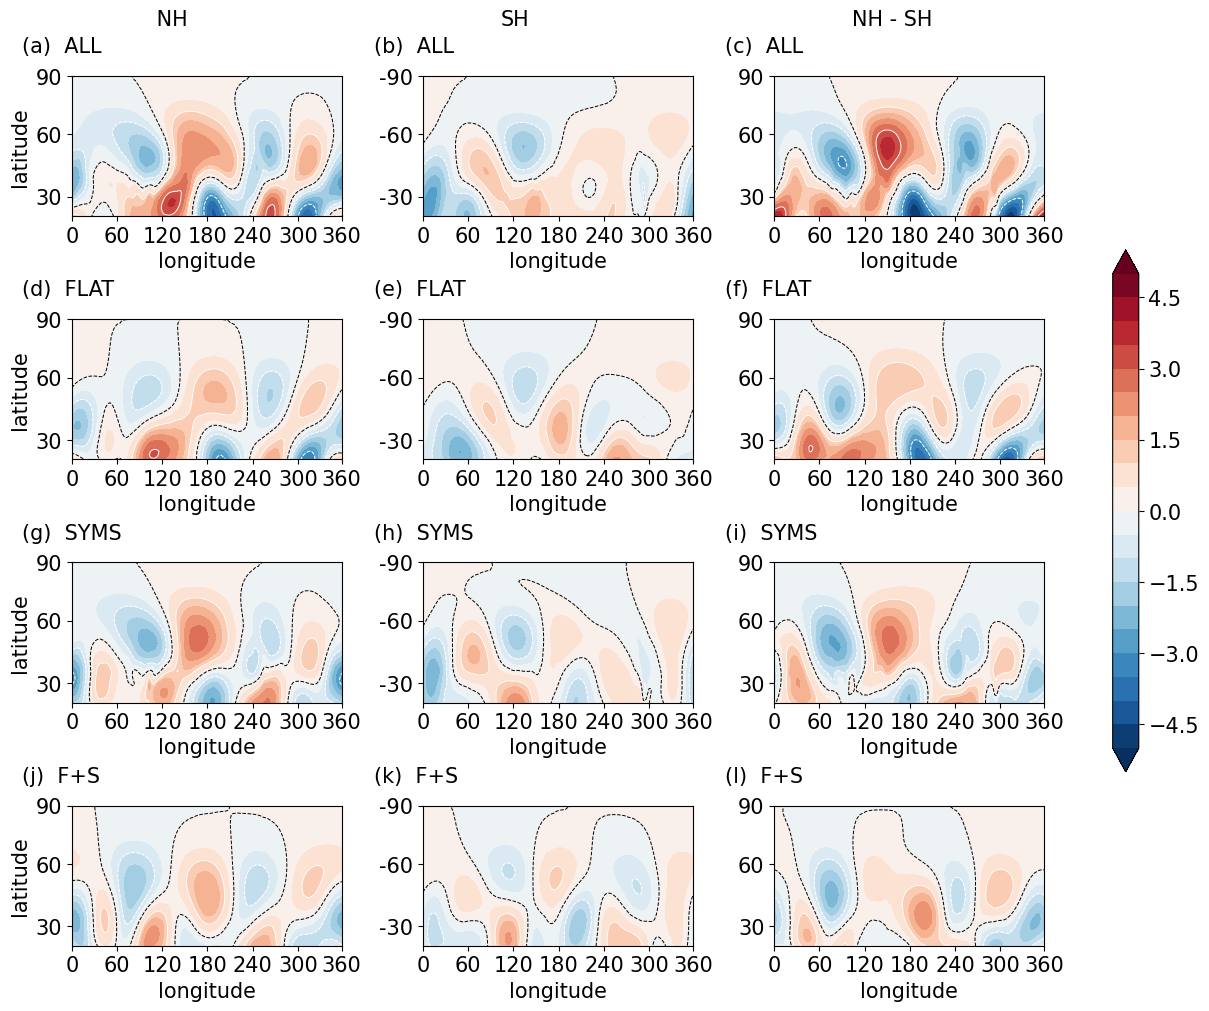

In [60]:
fig,ax = plot.subplots(4,3,figsize=(12,10),constrained_layout=True)#,projection=ccrs.PlateCarree())
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-5,5.5,0.5)
cll = np.arange(-5,6,2)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0,0].set_xticks(xxx)
ax[0,0].set_xticklabels(xx)
ax[0,0].set_yticks(yyy)
ax[0,0].set_yticklabels(yy)
ax[0,0].set_xlabel('longitude')
ax[0,0].set_ylabel('latitude')
ax[0,0].text(-35,53,'(a)  ALL')
ax[0,0].text(55,60,' NH')
ax[0,0].set_ylim(11,47)


p1=ax[0,0].contourf(x,y,vplre[0,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vplre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[0,0].contour(x,y,vplre[0,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p1=ax[0,0].contour(x,y,vplre[0,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[0,1].set_xticks(xxx)
ax[0,1].set_xticklabels(xx)
ax[0,1].set_yticks(yyy)
ax[0,1].set_yticklabels(yy)
ax[0,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[0,1].text(-35,53,'(b)  ALL')
ax[0,1].text(55,60,'SH')
ax[0,1].set_ylim(11,47)

p2=ax[0,1].contourf(x,y,vpl[0,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[0,1].contour(x,y,vpl[0,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[0,1].contour(x,y,vpl[0,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[0,2].set_xticks(xxx)
ax[0,2].set_xticklabels(xx)
ax[0,2].set_yticks(yyy)
ax[0,2].set_yticklabels(yy)
ax[0,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[0,2].text(-35,53,'(c)  ALL')
ax[0,2].text(55,60,'NH - SH')
ax[0,2].set_ylim(11,47)

p2=ax[0,2].contourf(x,y,-vpl[0,48:96,:,12]+vplre[0,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
plot.colorbar(p2,ax=ax.ravel().tolist(),shrink=0.6)
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[0,2].contour(x,y,-vpl[0,48:96,:,12]+vplre[0,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[0,2].contour(x,y,-vpl[0,48:96,:,12]+vplre[0,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')




ax[1,0].set_xticks(xxx)
ax[1,0].set_xticklabels(xx)
ax[1,0].set_yticks(yyy)
ax[1,0].set_yticklabels(yy)
ax[1,0].set_xlabel('longitude')
ax[1,0].set_ylabel('latitude')
ax[1,0].text(-35,53,'(d)  FLAT')
ax[1,0].set_ylim(11,47)


p1=ax[1,0].contourf(x,y,vplre[1,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vplre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[1,0].contour(x,y,vplre[1,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p1=ax[1,0].contour(x,y,vplre[1,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[1,1].set_xticks(xxx)
ax[1,1].set_xticklabels(xx)
ax[1,1].set_yticks(yyy)
ax[1,1].set_yticklabels(yy)
ax[1,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[1,1].text(-35,53,'(e)  FLAT')
ax[1,1].set_ylim(11,47)

p2=ax[1,1].contourf(x,y,vpl[1,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1,1].contour(x,y,vpl[1,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[1,1].contour(x,y,vpl[1,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[1,2].set_xticks(xxx)
ax[1,2].set_xticklabels(xx)
ax[1,2].set_yticks(yyy)
ax[1,2].set_yticklabels(yy)
ax[1,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[1,2].text(-35,53,'(f)  FLAT')
ax[1,2].set_ylim(11,47)

p2=ax[1,2].contourf(x,y,-vpl[1,48:96,:,12]+vplre[1,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1,2].contour(x,y,-vpl[1,48:96,:,12]+vplre[1,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[1,2].contour(x,y,-vpl[1,48:96,:,12]+vplre[1,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')





ax[2,0].set_xticks(xxx)
ax[2,0].set_xticklabels(xx)
ax[2,0].set_yticks(yyy)
ax[2,0].set_yticklabels(yy)
ax[2,0].set_xlabel('longitude')
ax[2,0].set_ylabel('latitude')
ax[2,0].text(-35,53,'(g)  SYMS')
ax[2,0].set_ylim(11,47)


p1=ax[2,0].contourf(x,y,vplre[2,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vplre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[2,0].contour(x,y,vplre[2,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p1=ax[2,0].contour(x,y,vplre[2,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[2,1].set_xticks(xxx)
ax[2,1].set_xticklabels(xx)
ax[2,1].set_yticks(yyy)
ax[2,1].set_yticklabels(yy)
ax[2,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[2,1].text(-35,53,'(h)  SYMS')
ax[2,1].set_ylim(11,47)

p2=ax[2,1].contourf(x,y,vpl[2,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[2,1].contour(x,y,vpl[2,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[2,1].contour(x,y,vpl[2,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[2,2].set_xticks(xxx)
ax[2,2].set_xticklabels(xx)
ax[2,2].set_yticks(yyy)
ax[2,2].set_yticklabels(yy)
ax[2,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[2,2].text(-35,53,'(i)  SYMS')
ax[2,2].set_ylim(11,47)

p2=ax[2,2].contourf(x,y,-vpl[2,48:96,:,12]+vplre[2,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[2,2].contour(x,y,-vpl[2,48:96,:,12]+vplre[2,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[2,2].contour(x,y,-vpl[2,48:96,:,12]+vplre[2,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')





ax[3,0].set_xticks(xxx)
ax[3,0].set_xticklabels(xx)
ax[3,0].set_yticks(yyy)
ax[3,0].set_yticklabels(yy)
ax[3,0].set_xlabel('longitude')
ax[3,0].set_ylabel('latitude')
ax[3,0].text(-35,53,'(j)  F+S')
ax[3,0].set_ylim(11,47)


p1=ax[3,0].contourf(x,y,vplre[3,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vplre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[3,0].contour(x,y,vplre[3,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p1=ax[3,0].contour(x,y,vplre[3,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[3,1].set_xticks(xxx)
ax[3,1].set_xticklabels(xx)
ax[3,1].set_yticks(yyy)
ax[3,1].set_yticklabels(yy)
ax[3,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[3,1].text(-35,53,'(k)  F+S')
ax[3,1].set_ylim(11,47)

p2=ax[3,1].contourf(x,y,vpl[3,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[3,1].contour(x,y,vpl[3,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[3,1].contour(x,y,vpl[3,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[3,2].set_xticks(xxx)
ax[3,2].set_xticklabels(xx)
ax[3,2].set_yticks(yyy)
ax[3,2].set_yticklabels(yy)
ax[3,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[3,2].text(-35,53,'(l)  F+S')
ax[3,2].set_ylim(11,47)

p2=ax[3,2].contourf(x,y,-vpl[3,48:96,:,12]+vplre[3,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[3,2].contour(x,y,-vpl[3,48:96,:,12]+vplre[3,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[3,2].contour(x,y,-vpl[3,48:96,:,12]+vplre[3,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')




plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/vpl_v_MJ_m^2_ssw_ns_100.png',dpi=600,bbox_inches='tight') 


/tmp/ipykernel_52847/3945410969.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plot.cm.get_cmap('RdBu')


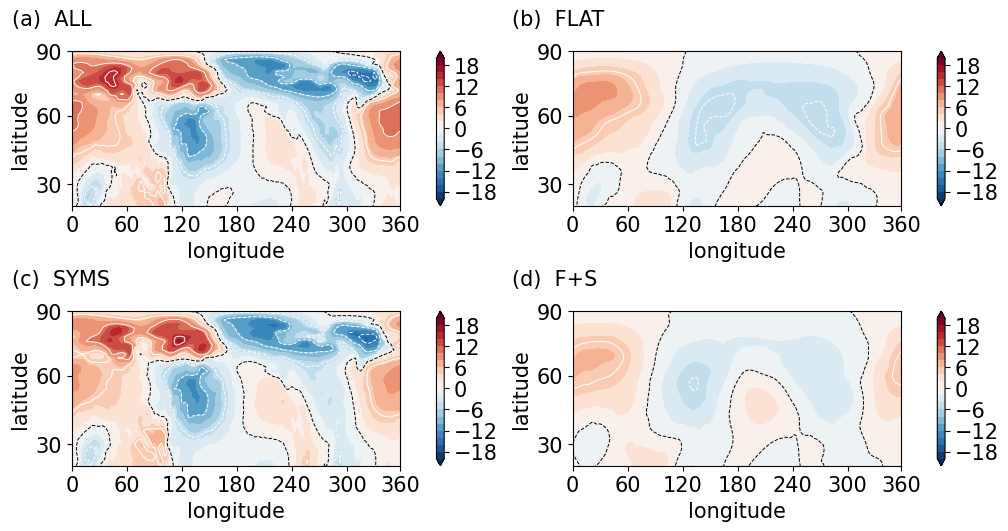

In [32]:
fig,ax = plot.subplots(2,2,figsize=(10,5.2),constrained_layout=True)
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-20,22,2)
cl1 = np.arange(-20,25,5)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0,0].set_xticks(xxx)
ax[0,0].set_xticklabels(xx)
ax[0,0].set_yticks(yyy)
ax[0,0].set_yticklabels(yy)
ax[0,0].set_xlabel('longitude')
ax[0,0].set_ylabel('latitude')
ax[0,0].text(-35,53,'(a)  ALL')
ax[0,0].set_ylim(11,47)

p1=ax[0,0].contourf(x,y,-tpl[0,48:96,:,2]+tplre[0,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p1,ax=ax[0,0])#,ticks=[-60,-30,0,30,60])
#cbar.ax.set_yticklabels(['-60','-30', '0','30', '60']) 
p1=ax[0,0].contour(x,y,-tpl[0,48:96,:,2]+tplre[0,48:96,:,2],levels=cl1,colors='white',linewidths=0.7)
p1=ax[0,0].contour(x,y,-tpl[0,48:96,:,2]+tplre[0,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')



ax[0,1].set_xticks(xxx)
ax[0,1].set_xticklabels(xx)
ax[0,1].set_yticks(yyy)
ax[0,1].set_yticklabels(yy)
ax[0,1].set_xlabel('longitude')
ax[0,1].set_ylabel('latitude')
ax[0,1].text(-35,53,'(b)  FLAT')
ax[0,1].set_ylim(11,47)

p2=ax[0,1].contourf(x,y,-tpl[1,48:96,:,2]+tplre[1,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p2,ax=ax[0,1])#,ticks=[-60,-30,0,30,60])
#cbar.ax.set_yticklabels(['-60','-30', '0','30', '60']) 
p2=ax[0,1].contour(x,y,-tpl[1,48:96,:,2]+tplre[1,48:96,:,2],levels=cl1,colors='white',linewidths=0.7)
p2=ax[0,1].contour(x,y,-tpl[1,48:96,:,2]+tplre[1,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')



ax[1,0].set_xticks(xxx)
ax[1,0].set_xticklabels(xx)
ax[1,0].set_yticks(yyy)
ax[1,0].set_yticklabels(yy)
ax[1,0].set_xlabel('longitude')
ax[1,0].set_ylabel('latitude')
ax[1,0].text(-35,53,'(c)  SYMS')
ax[1,0].set_ylim(11,47)

p3=ax[1,0].contourf(x,y,-tpl[2,48:96,:,2]+tplre[2,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p3,ax=ax[1,0])#,ticks=[-60,-30,0,30,60])
#cbar.ax.set_yticklabels(['-60','-30', '0','30', '60']) 
p3=ax[1,0].contour(x,y,-tpl[2,48:96,:,2]+tplre[2,48:96,:,2],levels=cl1,colors='white',linewidths=0.7)
p3=ax[1,0].contour(x,y,-tpl[2,48:96,:,2]+tplre[2,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')



ax[1,1].set_xticks(xxx)
ax[1,1].set_xticklabels(xx)
ax[1,1].set_yticks(yyy)
ax[1,1].set_yticklabels(yy)
ax[1,1].set_xlabel('longitude')
ax[1,1].set_ylabel('latitude')
ax[1,1].text(-35,53,'(d)  F+S')
ax[1,1].set_ylim(11,47)

p4=ax[1,1].contourf(x,y,-tpl[3,48:96,:,2]+tplre[3,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p4,ax=ax[1,1])#,ticks=[-60,-30,0,30,60])
#cbar.ax.set_yticklabels(['-60','-30', '0','30', '60']) 
p4=ax[1,1].contour(x,y,-tpl[3,48:96,:,2]+tplre[3,48:96,:,2],levels=cl1,colors='white',linewidths=0.7)
p4=ax[1,1].contour(x,y,-tpl[3,48:96,:,2]+tplre[3,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


barplot=np.zeros((4))
barplot[0] = (-np.mean(np.mean(tpl[0,59:96,0:191,2],axis=0),axis=0)+np.mean(np.mean((tplre[0,59:96,0:191,2]),axis=0),axis=0))/np.mean(np.mean((tplre[0,59:96,0:191,2]),axis=0),axis=0)*100
barplot[1] = (-np.mean(np.mean(tpl[1,59:96,0:191,2],axis=0),axis=0)+np.mean(np.mean((tplre[1,59:96,0:191,2]),axis=0),axis=0))/np.mean(np.mean((tplre[1,59:96,0:191,2]),axis=0),axis=0)*100
barplot[2] = (-np.mean(np.mean(tpl[2,59:96,0:191,2],axis=0),axis=0)+np.mean(np.mean((tplre[2,59:96,0:191,2]),axis=0),axis=0))/np.mean(np.mean((tplre[2,59:96,0:191,2]),axis=0),axis=0)*100
barplot[3] = (-np.mean(np.mean(tpl[3,59:96,0:191,2],axis=0),axis=0)+np.mean(np.mean((tplre[3,59:96,0:191,2]),axis=0),axis=0))/np.mean(np.mean((tplre[3,59:96,0:191,2]),axis=0),axis=0)*100



# name_list = ['ALL','FLAT','SYMS','F+S']
# ax[2,0].bar(range(len(barplot)),barplot,tick_label = name_list)
# ax[2,0].set_xlim(-1,4)
# ax[2,0].set_ylim(-80,80)
# ax[2,0].set_yticks([-20,-10,0,10,20,30,40])
# ax[2,0].set_yticklabels([-20,-10,0,10,20,30,40])
# ax[2,0].set_ylabel('Percent') 
# ax[2,0].text(-1.9,45,'(e)')
# ax[2,0].axhline(y=0,color='black',linewidth='1')

# ax[2,1].axis('off')

plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/tpl_v_MJ_m^2_ssw_850.png',dpi=600,bbox_inches='tight') 



/tmp/ipykernel_28423/1353203350.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plot.cm.get_cmap('RdBu')


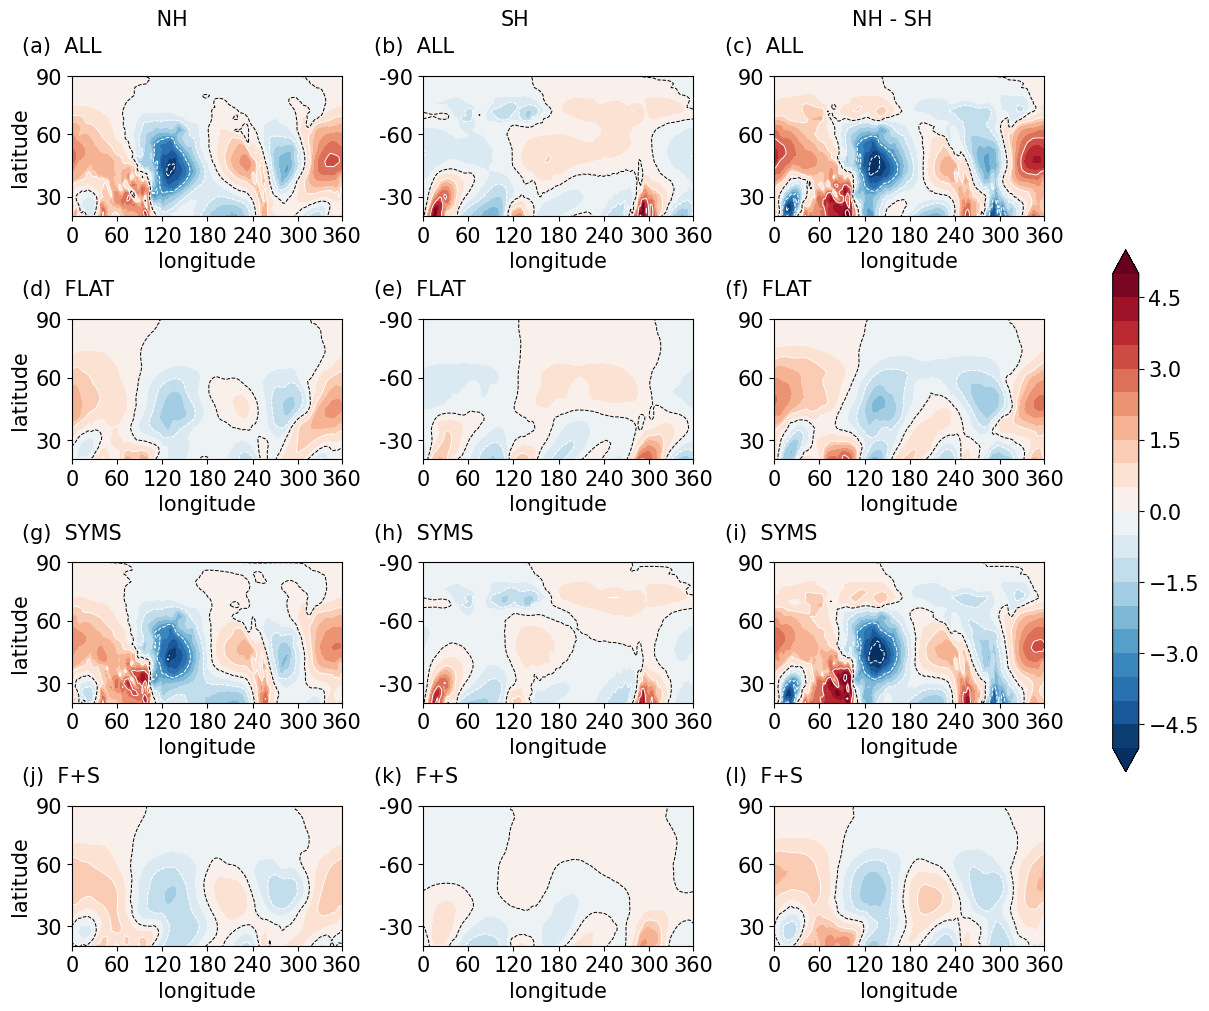

In [65]:
fig,ax = plot.subplots(4,3,figsize=(12,10),constrained_layout=True)#,projection=ccrs.PlateCarree())
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-5,5.5,0.5)
cll = np.arange(-5,6,2)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0,0].set_xticks(xxx)
ax[0,0].set_xticklabels(xx)
ax[0,0].set_yticks(yyy)
ax[0,0].set_yticklabels(yy)
ax[0,0].set_xlabel('longitude')
ax[0,0].set_ylabel('latitude')
ax[0,0].text(-35,53,'(a)  ALL')
ax[0,0].text(55,60,' NH')
ax[0,0].set_ylim(11,47)


p1=ax[0,0].contourf(x,y,tplre[0,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,tplre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[0,0].contour(x,y,tplre[0,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p1=ax[0,0].contour(x,y,tplre[0,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[0,1].set_xticks(xxx)
ax[0,1].set_xticklabels(xx)
ax[0,1].set_yticks(yyy)
ax[0,1].set_yticklabels(yy)
ax[0,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[0,1].text(-35,53,'(b)  ALL')
ax[0,1].text(55,60,'SH')
ax[0,1].set_ylim(11,47)

p2=ax[0,1].contourf(x,y,tpl[0,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[0,1].contour(x,y,tpl[0,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[0,1].contour(x,y,tpl[0,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[0,2].set_xticks(xxx)
ax[0,2].set_xticklabels(xx)
ax[0,2].set_yticks(yyy)
ax[0,2].set_yticklabels(yy)
ax[0,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[0,2].text(-35,53,'(c)  ALL')
ax[0,2].text(55,60,'NH - SH')
ax[0,2].set_ylim(11,47)

p2=ax[0,2].contourf(x,y,-tpl[0,48:96,:,2]+tplre[0,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
plot.colorbar(p2,ax=ax.ravel().tolist(),shrink=0.6)
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[0,2].contour(x,y,-tpl[0,48:96,:,2]+tplre[0,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[0,2].contour(x,y,-tpl[0,48:96,:,2]+tplre[0,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')




ax[1,0].set_xticks(xxx)
ax[1,0].set_xticklabels(xx)
ax[1,0].set_yticks(yyy)
ax[1,0].set_yticklabels(yy)
ax[1,0].set_xlabel('longitude')
ax[1,0].set_ylabel('latitude')
ax[1,0].text(-35,53,'(d)  FLAT')
ax[1,0].set_ylim(11,47)


p1=ax[1,0].contourf(x,y,tplre[1,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,tplre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[1,0].contour(x,y,tplre[1,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p1=ax[1,0].contour(x,y,tplre[1,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[1,1].set_xticks(xxx)
ax[1,1].set_xticklabels(xx)
ax[1,1].set_yticks(yyy)
ax[1,1].set_yticklabels(yy)
ax[1,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[1,1].text(-35,53,'(e)  FLAT')
ax[1,1].set_ylim(11,47)

p2=ax[1,1].contourf(x,y,tpl[1,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1,1].contour(x,y,tpl[1,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[1,1].contour(x,y,tpl[1,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[1,2].set_xticks(xxx)
ax[1,2].set_xticklabels(xx)
ax[1,2].set_yticks(yyy)
ax[1,2].set_yticklabels(yy)
ax[1,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[1,2].text(-35,53,'(f)  FLAT')
ax[1,2].set_ylim(11,47)

p2=ax[1,2].contourf(x,y,-tpl[1,48:96,:,2]+tplre[1,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1,2].contour(x,y,-tpl[1,48:96,:,2]+tplre[1,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[1,2].contour(x,y,-tpl[1,48:96,:,2]+tplre[1,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')





ax[2,0].set_xticks(xxx)
ax[2,0].set_xticklabels(xx)
ax[2,0].set_yticks(yyy)
ax[2,0].set_yticklabels(yy)
ax[2,0].set_xlabel('longitude')
ax[2,0].set_ylabel('latitude')
ax[2,0].text(-35,53,'(g)  SYMS')
ax[2,0].set_ylim(11,47)


p1=ax[2,0].contourf(x,y,tplre[2,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,tplre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[2,0].contour(x,y,tplre[2,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p1=ax[2,0].contour(x,y,tplre[2,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[2,1].set_xticks(xxx)
ax[2,1].set_xticklabels(xx)
ax[2,1].set_yticks(yyy)
ax[2,1].set_yticklabels(yy)
ax[2,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[2,1].text(-35,53,'(h)  SYMS')
ax[2,1].set_ylim(11,47)

p2=ax[2,1].contourf(x,y,tpl[2,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[2,1].contour(x,y,tpl[2,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[2,1].contour(x,y,tpl[2,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[2,2].set_xticks(xxx)
ax[2,2].set_xticklabels(xx)
ax[2,2].set_yticks(yyy)
ax[2,2].set_yticklabels(yy)
ax[2,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[2,2].text(-35,53,'(i)  SYMS')
ax[2,2].set_ylim(11,47)

p2=ax[2,2].contourf(x,y,-tpl[2,48:96,:,2]+tplre[2,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[2,2].contour(x,y,-tpl[2,48:96,:,2]+tplre[2,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[2,2].contour(x,y,-tpl[2,48:96,:,2]+tplre[2,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')





ax[3,0].set_xticks(xxx)
ax[3,0].set_xticklabels(xx)
ax[3,0].set_yticks(yyy)
ax[3,0].set_yticklabels(yy)
ax[3,0].set_xlabel('longitude')
ax[3,0].set_ylabel('latitude')
ax[3,0].text(-35,53,'(j)  F+S')
ax[3,0].set_ylim(11,47)


p1=ax[3,0].contourf(x,y,tplre[3,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,tplre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[3,0].contour(x,y,tplre[3,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p1=ax[3,0].contour(x,y,tplre[3,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[3,1].set_xticks(xxx)
ax[3,1].set_xticklabels(xx)
ax[3,1].set_yticks(yyy)
ax[3,1].set_yticklabels(yy)
ax[3,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[3,1].text(-35,53,'(k)  F+S')
ax[3,1].set_ylim(11,47)

p2=ax[3,1].contourf(x,y,tpl[3,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[3,1].contour(x,y,tpl[3,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[3,1].contour(x,y,tpl[3,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[3,2].set_xticks(xxx)
ax[3,2].set_xticklabels(xx)
ax[3,2].set_yticks(yyy)
ax[3,2].set_yticklabels(yy)
ax[3,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[3,2].text(-35,53,'(l)  F+S')
ax[3,2].set_ylim(11,47)

p2=ax[3,2].contourf(x,y,-tpl[3,48:96,:,2]+tplre[3,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[3,2].contour(x,y,-tpl[3,48:96,:,2]+tplre[3,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[3,2].contour(x,y,-tpl[3,48:96,:,2]+tplre[3,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')




plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/tpl_v_MJ_m^2_ssw_ns_850.png',dpi=600,bbox_inches='tight') 


/tmp/ipykernel_28423/487535718.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plot.cm.get_cmap('RdBu')


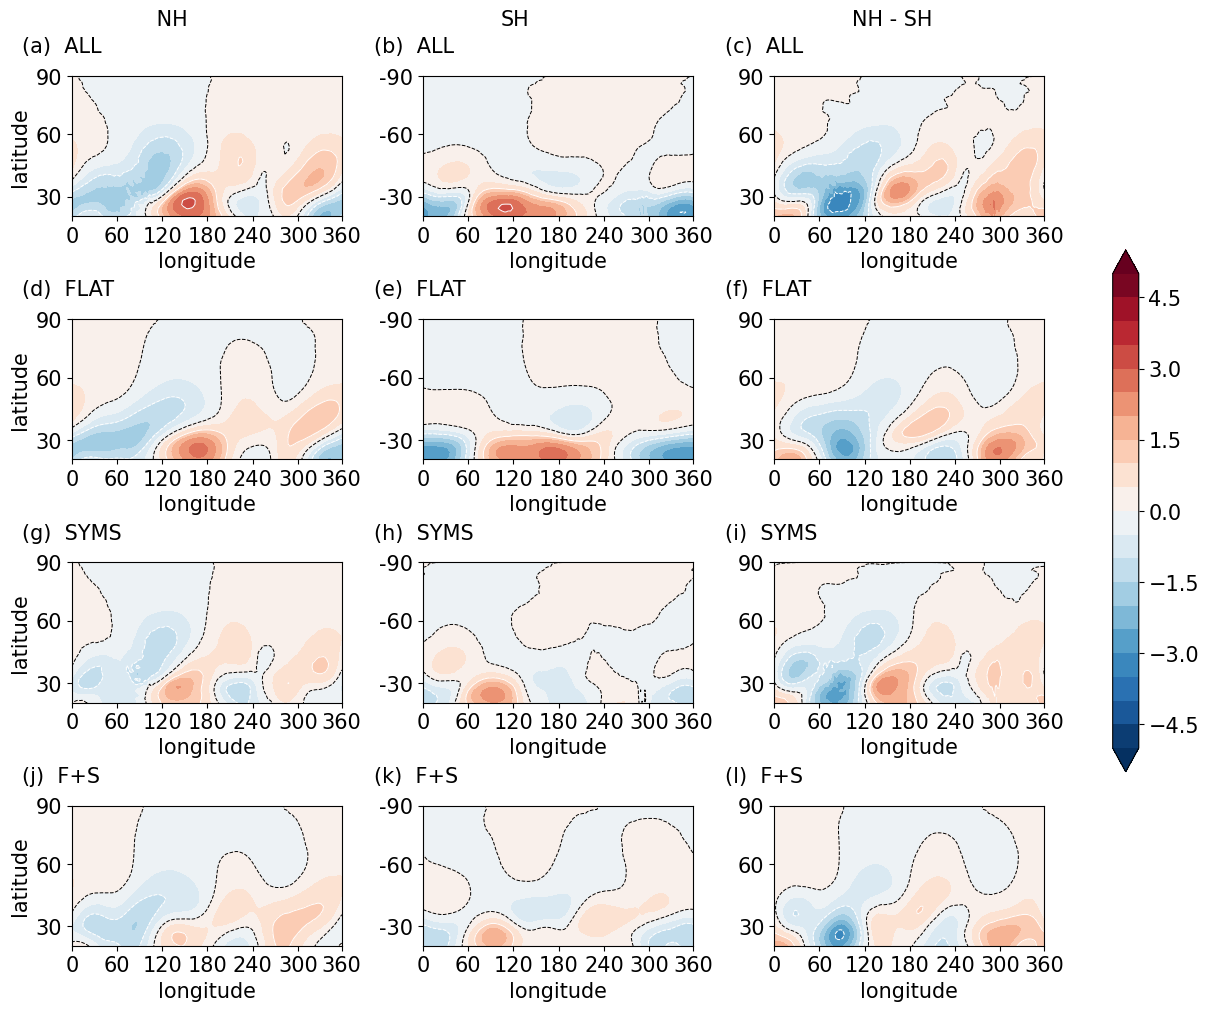

In [66]:
fig,ax = plot.subplots(4,3,figsize=(12,10),constrained_layout=True)#,projection=ccrs.PlateCarree())
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-5,5.5,0.5)
cll = np.arange(-5,6,2)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0,0].set_xticks(xxx)
ax[0,0].set_xticklabels(xx)
ax[0,0].set_yticks(yyy)
ax[0,0].set_yticklabels(yy)
ax[0,0].set_xlabel('longitude')
ax[0,0].set_ylabel('latitude')
ax[0,0].text(-35,53,'(a)  ALL')
ax[0,0].text(55,60,' NH')
ax[0,0].set_ylim(11,47)


p1=ax[0,0].contourf(x,y,tplre[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,tplre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[0,0].contour(x,y,tplre[0,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p1=ax[0,0].contour(x,y,tplre[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[0,1].set_xticks(xxx)
ax[0,1].set_xticklabels(xx)
ax[0,1].set_yticks(yyy)
ax[0,1].set_yticklabels(yy)
ax[0,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[0,1].text(-35,53,'(b)  ALL')
ax[0,1].text(55,60,'SH')
ax[0,1].set_ylim(11,47)

p2=ax[0,1].contourf(x,y,tpl[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[0,1].contour(x,y,tpl[0,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[0,1].contour(x,y,tpl[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[0,2].set_xticks(xxx)
ax[0,2].set_xticklabels(xx)
ax[0,2].set_yticks(yyy)
ax[0,2].set_yticklabels(yy)
ax[0,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[0,2].text(-35,53,'(c)  ALL')
ax[0,2].text(55,60,'NH - SH')
ax[0,2].set_ylim(11,47)

p2=ax[0,2].contourf(x,y,-tpl[0,48:96,:,8]+tplre[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
plot.colorbar(p2,ax=ax.ravel().tolist(),shrink=0.6)
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[0,2].contour(x,y,-tpl[0,48:96,:,8]+tplre[0,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[0,2].contour(x,y,-tpl[0,48:96,:,8]+tplre[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')




ax[1,0].set_xticks(xxx)
ax[1,0].set_xticklabels(xx)
ax[1,0].set_yticks(yyy)
ax[1,0].set_yticklabels(yy)
ax[1,0].set_xlabel('longitude')
ax[1,0].set_ylabel('latitude')
ax[1,0].text(-35,53,'(d)  FLAT')
ax[1,0].set_ylim(11,47)


p1=ax[1,0].contourf(x,y,tplre[1,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,tplre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[1,0].contour(x,y,tplre[1,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p1=ax[1,0].contour(x,y,tplre[1,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[1,1].set_xticks(xxx)
ax[1,1].set_xticklabels(xx)
ax[1,1].set_yticks(yyy)
ax[1,1].set_yticklabels(yy)
ax[1,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[1,1].text(-35,53,'(e)  FLAT')
ax[1,1].set_ylim(11,47)

p2=ax[1,1].contourf(x,y,tpl[1,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1,1].contour(x,y,tpl[1,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[1,1].contour(x,y,tpl[1,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[1,2].set_xticks(xxx)
ax[1,2].set_xticklabels(xx)
ax[1,2].set_yticks(yyy)
ax[1,2].set_yticklabels(yy)
ax[1,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[1,2].text(-35,53,'(f)  FLAT')
ax[1,2].set_ylim(11,47)

p2=ax[1,2].contourf(x,y,-tpl[1,48:96,:,8]+tplre[1,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1,2].contour(x,y,-tpl[1,48:96,:,8]+tplre[1,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[1,2].contour(x,y,-tpl[1,48:96,:,8]+tplre[1,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')





ax[2,0].set_xticks(xxx)
ax[2,0].set_xticklabels(xx)
ax[2,0].set_yticks(yyy)
ax[2,0].set_yticklabels(yy)
ax[2,0].set_xlabel('longitude')
ax[2,0].set_ylabel('latitude')
ax[2,0].text(-35,53,'(g)  SYMS')
ax[2,0].set_ylim(11,47)


p1=ax[2,0].contourf(x,y,tplre[2,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,tplre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[2,0].contour(x,y,tplre[2,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p1=ax[2,0].contour(x,y,tplre[2,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[2,1].set_xticks(xxx)
ax[2,1].set_xticklabels(xx)
ax[2,1].set_yticks(yyy)
ax[2,1].set_yticklabels(yy)
ax[2,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[2,1].text(-35,53,'(h)  SYMS')
ax[2,1].set_ylim(11,47)

p2=ax[2,1].contourf(x,y,tpl[2,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[2,1].contour(x,y,tpl[2,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[2,1].contour(x,y,tpl[2,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[2,2].set_xticks(xxx)
ax[2,2].set_xticklabels(xx)
ax[2,2].set_yticks(yyy)
ax[2,2].set_yticklabels(yy)
ax[2,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[2,2].text(-35,53,'(i)  SYMS')
ax[2,2].set_ylim(11,47)

p2=ax[2,2].contourf(x,y,-tpl[2,48:96,:,8]+tplre[2,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[2,2].contour(x,y,-tpl[2,48:96,:,8]+tplre[2,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[2,2].contour(x,y,-tpl[2,48:96,:,8]+tplre[2,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')





ax[3,0].set_xticks(xxx)
ax[3,0].set_xticklabels(xx)
ax[3,0].set_yticks(yyy)
ax[3,0].set_yticklabels(yy)
ax[3,0].set_xlabel('longitude')
ax[3,0].set_ylabel('latitude')
ax[3,0].text(-35,53,'(j)  F+S')
ax[3,0].set_ylim(11,47)


p1=ax[3,0].contourf(x,y,tplre[3,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,tplre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[3,0].contour(x,y,tplre[3,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p1=ax[3,0].contour(x,y,tplre[3,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[3,1].set_xticks(xxx)
ax[3,1].set_xticklabels(xx)
ax[3,1].set_yticks(yyy)
ax[3,1].set_yticklabels(yy)
ax[3,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[3,1].text(-35,53,'(k)  F+S')
ax[3,1].set_ylim(11,47)

p2=ax[3,1].contourf(x,y,tpl[3,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[3,1].contour(x,y,tpl[3,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[3,1].contour(x,y,tpl[3,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[3,2].set_xticks(xxx)
ax[3,2].set_xticklabels(xx)
ax[3,2].set_yticks(yyy)
ax[3,2].set_yticklabels(yy)
ax[3,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[3,2].text(-35,53,'(l)  F+S')
ax[3,2].set_ylim(11,47)

p2=ax[3,2].contourf(x,y,-tpl[3,48:96,:,8]+tplre[3,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[3,2].contour(x,y,-tpl[3,48:96,:,8]+tplre[3,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[3,2].contour(x,y,-tpl[3,48:96,:,8]+tplre[3,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')




plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/tpl_v_MJ_m^2_ssw_ns_300.png',dpi=600,bbox_inches='tight') 


/tmp/ipykernel_28423/2251737687.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plot.cm.get_cmap('RdBu')


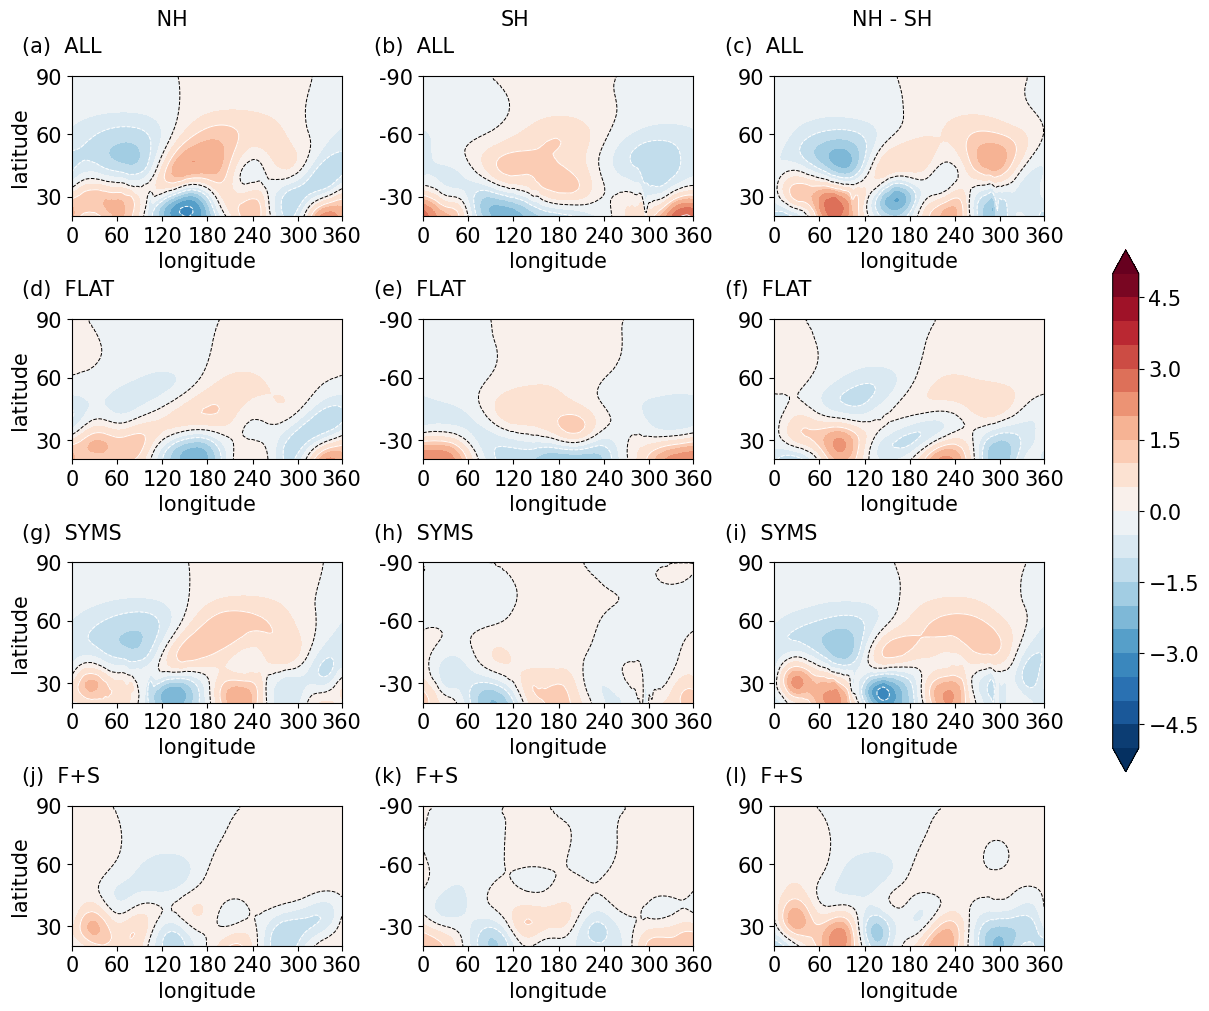

In [67]:
fig,ax = plot.subplots(4,3,figsize=(12,10),constrained_layout=True)#,projection=ccrs.PlateCarree())
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-5,5.5,0.5)
cll = np.arange(-5,6,2)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0,0].set_xticks(xxx)
ax[0,0].set_xticklabels(xx)
ax[0,0].set_yticks(yyy)
ax[0,0].set_yticklabels(yy)
ax[0,0].set_xlabel('longitude')
ax[0,0].set_ylabel('latitude')
ax[0,0].text(-35,53,'(a)  ALL')
ax[0,0].text(55,60,' NH')
ax[0,0].set_ylim(11,47)


p1=ax[0,0].contourf(x,y,tplre[0,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,tplre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[0,0].contour(x,y,tplre[0,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p1=ax[0,0].contour(x,y,tplre[0,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[0,1].set_xticks(xxx)
ax[0,1].set_xticklabels(xx)
ax[0,1].set_yticks(yyy)
ax[0,1].set_yticklabels(yy)
ax[0,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[0,1].text(-35,53,'(b)  ALL')
ax[0,1].text(55,60,'SH')
ax[0,1].set_ylim(11,47)

p2=ax[0,1].contourf(x,y,tpl[0,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[0,1].contour(x,y,tpl[0,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[0,1].contour(x,y,tpl[0,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[0,2].set_xticks(xxx)
ax[0,2].set_xticklabels(xx)
ax[0,2].set_yticks(yyy)
ax[0,2].set_yticklabels(yy)
ax[0,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[0,2].text(-35,53,'(c)  ALL')
ax[0,2].text(55,60,'NH - SH')
ax[0,2].set_ylim(11,47)

p2=ax[0,2].contourf(x,y,-tpl[0,48:96,:,12]+tplre[0,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
plot.colorbar(p2,ax=ax.ravel().tolist(),shrink=0.6)
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[0,2].contour(x,y,-tpl[0,48:96,:,12]+tplre[0,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[0,2].contour(x,y,-tpl[0,48:96,:,12]+tplre[0,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')




ax[1,0].set_xticks(xxx)
ax[1,0].set_xticklabels(xx)
ax[1,0].set_yticks(yyy)
ax[1,0].set_yticklabels(yy)
ax[1,0].set_xlabel('longitude')
ax[1,0].set_ylabel('latitude')
ax[1,0].text(-35,53,'(d)  FLAT')
ax[1,0].set_ylim(11,47)


p1=ax[1,0].contourf(x,y,tplre[1,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,tplre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[1,0].contour(x,y,tplre[1,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p1=ax[1,0].contour(x,y,tplre[1,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[1,1].set_xticks(xxx)
ax[1,1].set_xticklabels(xx)
ax[1,1].set_yticks(yyy)
ax[1,1].set_yticklabels(yy)
ax[1,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[1,1].text(-35,53,'(e)  FLAT')
ax[1,1].set_ylim(11,47)

p2=ax[1,1].contourf(x,y,tpl[1,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1,1].contour(x,y,tpl[1,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[1,1].contour(x,y,tpl[1,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[1,2].set_xticks(xxx)
ax[1,2].set_xticklabels(xx)
ax[1,2].set_yticks(yyy)
ax[1,2].set_yticklabels(yy)
ax[1,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[1,2].text(-35,53,'(f)  FLAT')
ax[1,2].set_ylim(11,47)

p2=ax[1,2].contourf(x,y,-tpl[1,48:96,:,12]+tplre[1,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1,2].contour(x,y,-tpl[1,48:96,:,12]+tplre[1,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[1,2].contour(x,y,-tpl[1,48:96,:,12]+tplre[1,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')





ax[2,0].set_xticks(xxx)
ax[2,0].set_xticklabels(xx)
ax[2,0].set_yticks(yyy)
ax[2,0].set_yticklabels(yy)
ax[2,0].set_xlabel('longitude')
ax[2,0].set_ylabel('latitude')
ax[2,0].text(-35,53,'(g)  SYMS')
ax[2,0].set_ylim(11,47)


p1=ax[2,0].contourf(x,y,tplre[2,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,tplre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[2,0].contour(x,y,tplre[2,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p1=ax[2,0].contour(x,y,tplre[2,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[2,1].set_xticks(xxx)
ax[2,1].set_xticklabels(xx)
ax[2,1].set_yticks(yyy)
ax[2,1].set_yticklabels(yy)
ax[2,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[2,1].text(-35,53,'(h)  SYMS')
ax[2,1].set_ylim(11,47)

p2=ax[2,1].contourf(x,y,tpl[2,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[2,1].contour(x,y,tpl[2,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[2,1].contour(x,y,tpl[2,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[2,2].set_xticks(xxx)
ax[2,2].set_xticklabels(xx)
ax[2,2].set_yticks(yyy)
ax[2,2].set_yticklabels(yy)
ax[2,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[2,2].text(-35,53,'(i)  SYMS')
ax[2,2].set_ylim(11,47)

p2=ax[2,2].contourf(x,y,-tpl[2,48:96,:,12]+tplre[2,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[2,2].contour(x,y,-tpl[2,48:96,:,12]+tplre[2,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[2,2].contour(x,y,-tpl[2,48:96,:,12]+tplre[2,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')





ax[3,0].set_xticks(xxx)
ax[3,0].set_xticklabels(xx)
ax[3,0].set_yticks(yyy)
ax[3,0].set_yticklabels(yy)
ax[3,0].set_xlabel('longitude')
ax[3,0].set_ylabel('latitude')
ax[3,0].text(-35,53,'(j)  F+S')
ax[3,0].set_ylim(11,47)


p1=ax[3,0].contourf(x,y,tplre[3,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,tplre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[3,0].contour(x,y,tplre[3,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p1=ax[3,0].contour(x,y,tplre[3,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[3,1].set_xticks(xxx)
ax[3,1].set_xticklabels(xx)
ax[3,1].set_yticks(yyy)
ax[3,1].set_yticklabels(yy)
ax[3,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[3,1].text(-35,53,'(k)  F+S')
ax[3,1].set_ylim(11,47)

p2=ax[3,1].contourf(x,y,tpl[3,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[3,1].contour(x,y,tpl[3,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[3,1].contour(x,y,tpl[3,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[3,2].set_xticks(xxx)
ax[3,2].set_xticklabels(xx)
ax[3,2].set_yticks(yyy)
ax[3,2].set_yticklabels(yy)
ax[3,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[3,2].text(-35,53,'(l)  F+S')
ax[3,2].set_ylim(11,47)

p2=ax[3,2].contourf(x,y,-tpl[3,48:96,:,12]+tplre[3,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[3,2].contour(x,y,-tpl[3,48:96,:,12]+tplre[3,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[3,2].contour(x,y,-tpl[3,48:96,:,12]+tplre[3,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')




plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/tpl_v_MJ_m^2_ssw_ns_100.png',dpi=600,bbox_inches='tight') 


/tmp/ipykernel_15012/2682675377.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plot.cm.get_cmap('RdBu')


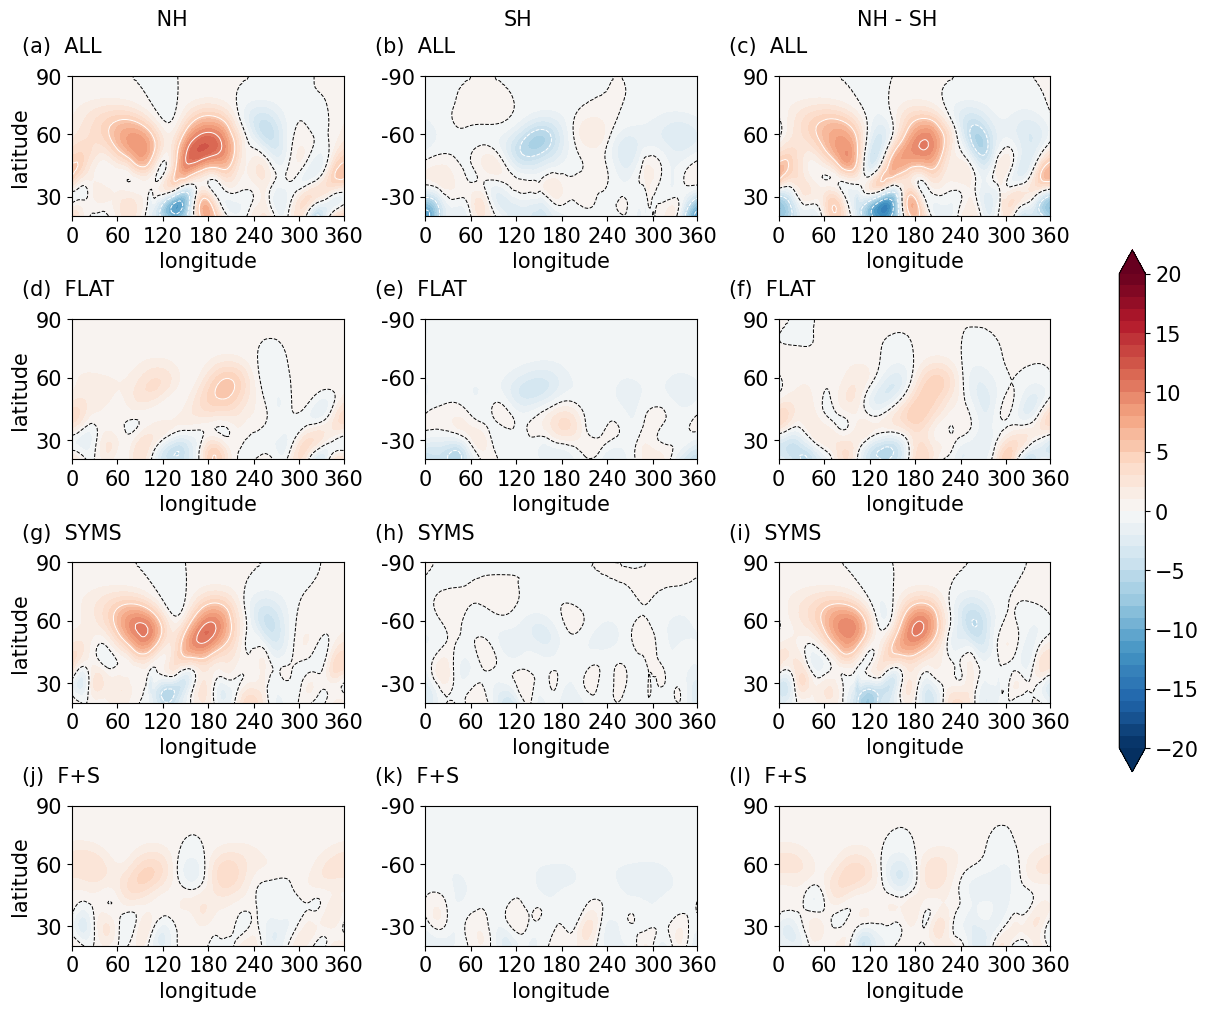

In [18]:
fig,ax = plot.subplots(4,3,figsize=(12,10),constrained_layout=True)#,projection=ccrs.PlateCarree())
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-20,21,1)
cll = np.arange(-20,25,5)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0,0].set_xticks(xxx)
ax[0,0].set_xticklabels(xx)
ax[0,0].set_yticks(yyy)
ax[0,0].set_yticklabels(yy)
ax[0,0].set_xlabel('longitude')
ax[0,0].set_ylabel('latitude')
ax[0,0].text(-35,53,'(a)  ALL')
ax[0,0].text(55,60,' NH')
ax[0,0].set_ylim(11,47)


p1=ax[0,0].contourf(x,y,vtre[0,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[0,0].contour(x,y,vtre[0,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p1=ax[0,0].contour(x,y,vtre[0,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[0,1].set_xticks(xxx)
ax[0,1].set_xticklabels(xx)
ax[0,1].set_yticks(yyy)
ax[0,1].set_yticklabels(yy)
ax[0,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[0,1].text(-35,53,'(b)  ALL')
ax[0,1].text(55,60,'SH')
ax[0,1].set_ylim(11,47)

p2=ax[0,1].contourf(x,y,vt[0,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[0,1].contour(x,y,vt[0,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[0,1].contour(x,y,vt[0,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[0,2].set_xticks(xxx)
ax[0,2].set_xticklabels(xx)
ax[0,2].set_yticks(yyy)
ax[0,2].set_yticklabels(yy)
ax[0,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[0,2].text(-35,53,'(c)  ALL')
ax[0,2].text(55,60,'NH - SH')
ax[0,2].set_ylim(11,47)

p2=ax[0,2].contourf(x,y,vt[0,48:96,:,12]+vtre[0,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
plot.colorbar(p2,ax=ax.ravel().tolist(),shrink=0.6)
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[0,2].contour(x,y,vt[0,48:96,:,12]+vtre[0,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[0,2].contour(x,y,vt[0,48:96,:,12]+vtre[0,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')




ax[1,0].set_xticks(xxx)
ax[1,0].set_xticklabels(xx)
ax[1,0].set_yticks(yyy)
ax[1,0].set_yticklabels(yy)
ax[1,0].set_xlabel('longitude')
ax[1,0].set_ylabel('latitude')
ax[1,0].text(-35,53,'(d)  FLAT')
ax[1,0].set_ylim(11,47)


p1=ax[1,0].contourf(x,y,vtre[1,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[1,0].contour(x,y,vtre[1,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p1=ax[1,0].contour(x,y,vtre[1,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[1,1].set_xticks(xxx)
ax[1,1].set_xticklabels(xx)
ax[1,1].set_yticks(yyy)
ax[1,1].set_yticklabels(yy)
ax[1,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[1,1].text(-35,53,'(e)  FLAT')
ax[1,1].set_ylim(11,47)

p2=ax[1,1].contourf(x,y,vt[1,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1,1].contour(x,y,vt[1,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[1,1].contour(x,y,vt[1,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[1,2].set_xticks(xxx)
ax[1,2].set_xticklabels(xx)
ax[1,2].set_yticks(yyy)
ax[1,2].set_yticklabels(yy)
ax[1,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[1,2].text(-35,53,'(f)  FLAT')
ax[1,2].set_ylim(11,47)

p2=ax[1,2].contourf(x,y,vt[1,48:96,:,12]+vtre[1,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1,2].contour(x,y,vt[1,48:96,:,12]+vtre[1,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[1,2].contour(x,y,vt[1,48:96,:,12]+vtre[1,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')





ax[2,0].set_xticks(xxx)
ax[2,0].set_xticklabels(xx)
ax[2,0].set_yticks(yyy)
ax[2,0].set_yticklabels(yy)
ax[2,0].set_xlabel('longitude')
ax[2,0].set_ylabel('latitude')
ax[2,0].text(-35,53,'(g)  SYMS')
ax[2,0].set_ylim(11,47)


p1=ax[2,0].contourf(x,y,vtre[2,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[2,0].contour(x,y,vtre[2,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p1=ax[2,0].contour(x,y,vtre[2,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[2,1].set_xticks(xxx)
ax[2,1].set_xticklabels(xx)
ax[2,1].set_yticks(yyy)
ax[2,1].set_yticklabels(yy)
ax[2,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[2,1].text(-35,53,'(h)  SYMS')
ax[2,1].set_ylim(11,47)

p2=ax[2,1].contourf(x,y,vt[2,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[2,1].contour(x,y,vt[2,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[2,1].contour(x,y,vt[2,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[2,2].set_xticks(xxx)
ax[2,2].set_xticklabels(xx)
ax[2,2].set_yticks(yyy)
ax[2,2].set_yticklabels(yy)
ax[2,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[2,2].text(-35,53,'(i)  SYMS')
ax[2,2].set_ylim(11,47)

p2=ax[2,2].contourf(x,y,vt[2,48:96,:,12]+vtre[2,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[2,2].contour(x,y,vt[2,48:96,:,12]+vtre[2,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[2,2].contour(x,y,vt[2,48:96,:,12]+vtre[2,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')





ax[3,0].set_xticks(xxx)
ax[3,0].set_xticklabels(xx)
ax[3,0].set_yticks(yyy)
ax[3,0].set_yticklabels(yy)
ax[3,0].set_xlabel('longitude')
ax[3,0].set_ylabel('latitude')
ax[3,0].text(-35,53,'(j)  F+S')
ax[3,0].set_ylim(11,47)


p1=ax[3,0].contourf(x,y,vtre[3,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[3,0].contour(x,y,vtre[3,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p1=ax[3,0].contour(x,y,vtre[3,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[3,1].set_xticks(xxx)
ax[3,1].set_xticklabels(xx)
ax[3,1].set_yticks(yyy)
ax[3,1].set_yticklabels(yy)
ax[3,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[3,1].text(-35,53,'(k)  F+S')
ax[3,1].set_ylim(11,47)

p2=ax[3,1].contourf(x,y,vt[3,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[3,1].contour(x,y,vt[3,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[3,1].contour(x,y,vt[3,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[3,2].set_xticks(xxx)
ax[3,2].set_xticklabels(xx)
ax[3,2].set_yticks(yyy)
ax[3,2].set_yticklabels(yy)
ax[3,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[3,2].text(-35,53,'(l)  F+S')
ax[3,2].set_ylim(11,47)

p2=ax[3,2].contourf(x,y,vt[3,48:96,:,12]+vtre[3,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[3,2].contour(x,y,vt[3,48:96,:,12]+vtre[3,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[3,2].contour(x,y,vt[3,48:96,:,12]+vtre[3,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')




plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/vt_v_MJ_m^2_ssw_ns_100.png',dpi=600,bbox_inches='tight') 


/tmp/ipykernel_28423/1732988477.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plot.cm.get_cmap('RdBu')


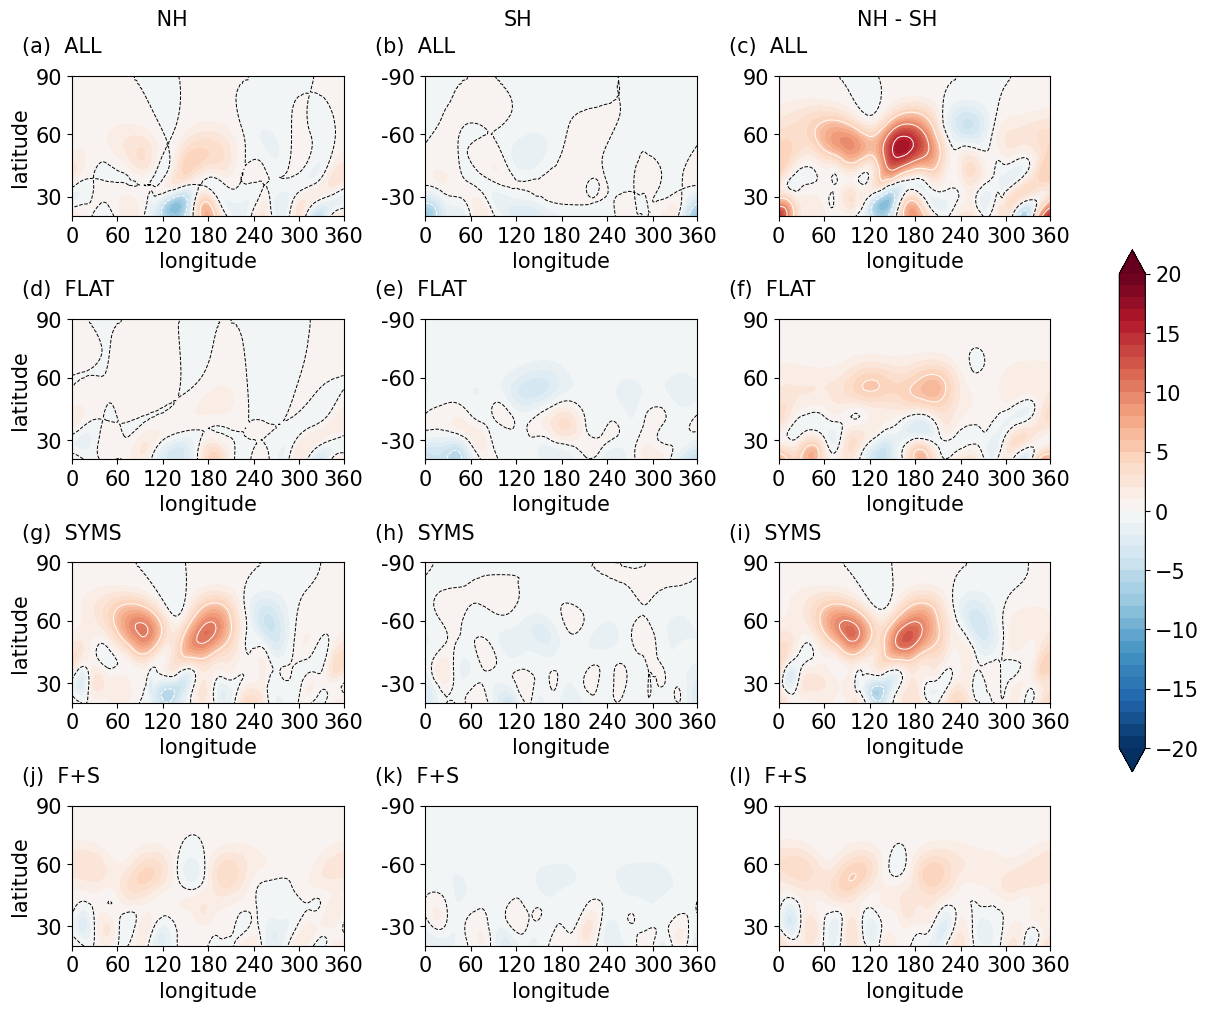

In [75]:
fig,ax = plot.subplots(4,3,figsize=(12,10),constrained_layout=True)#,projection=ccrs.PlateCarree())
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-20,21,1)
cll = np.arange(-20,25,5)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0,0].set_xticks(xxx)
ax[0,0].set_xticklabels(xx)
ax[0,0].set_yticks(yyy)
ax[0,0].set_yticklabels(yy)
ax[0,0].set_xlabel('longitude')
ax[0,0].set_ylabel('latitude')
ax[0,0].text(-35,53,'(a)  ALL')
ax[0,0].text(55,60,' NH')
ax[0,0].set_ylim(11,47)


p1=ax[0,0].contourf(x,y,vplre[0,48:96,:,12]*tplre[0,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[0,0].contour(x,y,vplre[0,48:96,:,12]*tplre[0,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p1=ax[0,0].contour(x,y,vplre[0,48:96,:,12]*tplre[0,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[0,1].set_xticks(xxx)
ax[0,1].set_xticklabels(xx)
ax[0,1].set_yticks(yyy)
ax[0,1].set_yticklabels(yy)
ax[0,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[0,1].text(-35,53,'(b)  ALL')
ax[0,1].text(55,60,'SH')
ax[0,1].set_ylim(11,47)

p2=ax[0,1].contourf(x,y,vpl[0,48:96,:,12]*tpl[0,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[0,1].contour(x,y,vpl[0,48:96,:,12]*tpl[0,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[0,1].contour(x,y,vpl[0,48:96,:,12]*tpl[0,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[0,2].set_xticks(xxx)
ax[0,2].set_xticklabels(xx)
ax[0,2].set_yticks(yyy)
ax[0,2].set_yticklabels(yy)
ax[0,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[0,2].text(-35,53,'(c)  ALL')
ax[0,2].text(55,60,'NH - SH')
ax[0,2].set_ylim(11,47)

p2=ax[0,2].contourf(x,y,-vt[0,48:96,:,12]+vtre[0,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
plot.colorbar(p2,ax=ax.ravel().tolist(),shrink=0.6)
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[0,2].contour(x,y,-vt[0,48:96,:,12]+vtre[0,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[0,2].contour(x,y,-vt[0,48:96,:,12]+vtre[0,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')




ax[1,0].set_xticks(xxx)
ax[1,0].set_xticklabels(xx)
ax[1,0].set_yticks(yyy)
ax[1,0].set_yticklabels(yy)
ax[1,0].set_xlabel('longitude')
ax[1,0].set_ylabel('latitude')
ax[1,0].text(-35,53,'(d)  FLAT')
ax[1,0].set_ylim(11,47)


p1=ax[1,0].contourf(x,y,vplre[1,48:96,:,12]*tplre[1,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[1,0].contour(x,y,vplre[1,48:96,:,12]*tplre[1,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p1=ax[1,0].contour(x,y,vplre[1,48:96,:,12]*tplre[1,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[1,1].set_xticks(xxx)
ax[1,1].set_xticklabels(xx)
ax[1,1].set_yticks(yyy)
ax[1,1].set_yticklabels(yy)
ax[1,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[1,1].text(-35,53,'(e)  FLAT')
ax[1,1].set_ylim(11,47)

p2=ax[1,1].contourf(x,y,vt[1,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1,1].contour(x,y,vt[1,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[1,1].contour(x,y,vt[1,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[1,2].set_xticks(xxx)
ax[1,2].set_xticklabels(xx)
ax[1,2].set_yticks(yyy)
ax[1,2].set_yticklabels(yy)
ax[1,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[1,2].text(-35,53,'(f)  FLAT')
ax[1,2].set_ylim(11,47)

p2=ax[1,2].contourf(x,y,-vt[1,48:96,:,12]+vtre[1,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1,2].contour(x,y,-vt[1,48:96,:,12]+vtre[1,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[1,2].contour(x,y,-vt[1,48:96,:,12]+vtre[1,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')





ax[2,0].set_xticks(xxx)
ax[2,0].set_xticklabels(xx)
ax[2,0].set_yticks(yyy)
ax[2,0].set_yticklabels(yy)
ax[2,0].set_xlabel('longitude')
ax[2,0].set_ylabel('latitude')
ax[2,0].text(-35,53,'(g)  SYMS')
ax[2,0].set_ylim(11,47)


p1=ax[2,0].contourf(x,y,vtre[2,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[2,0].contour(x,y,vtre[2,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p1=ax[2,0].contour(x,y,vtre[2,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[2,1].set_xticks(xxx)
ax[2,1].set_xticklabels(xx)
ax[2,1].set_yticks(yyy)
ax[2,1].set_yticklabels(yy)
ax[2,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[2,1].text(-35,53,'(h)  SYMS')
ax[2,1].set_ylim(11,47)

p2=ax[2,1].contourf(x,y,vt[2,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[2,1].contour(x,y,vt[2,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[2,1].contour(x,y,vt[2,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[2,2].set_xticks(xxx)
ax[2,2].set_xticklabels(xx)
ax[2,2].set_yticks(yyy)
ax[2,2].set_yticklabels(yy)
ax[2,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[2,2].text(-35,53,'(i)  SYMS')
ax[2,2].set_ylim(11,47)

p2=ax[2,2].contourf(x,y,-vt[2,48:96,:,12]+vtre[2,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[2,2].contour(x,y,-vt[2,48:96,:,12]+vtre[2,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[2,2].contour(x,y,-vt[2,48:96,:,12]+vtre[2,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')





ax[3,0].set_xticks(xxx)
ax[3,0].set_xticklabels(xx)
ax[3,0].set_yticks(yyy)
ax[3,0].set_yticklabels(yy)
ax[3,0].set_xlabel('longitude')
ax[3,0].set_ylabel('latitude')
ax[3,0].text(-35,53,'(j)  F+S')
ax[3,0].set_ylim(11,47)


p1=ax[3,0].contourf(x,y,vtre[3,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[3,0].contour(x,y,vtre[3,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p1=ax[3,0].contour(x,y,vtre[3,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[3,1].set_xticks(xxx)
ax[3,1].set_xticklabels(xx)
ax[3,1].set_yticks(yyy)
ax[3,1].set_yticklabels(yy)
ax[3,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[3,1].text(-35,53,'(k)  F+S')
ax[3,1].set_ylim(11,47)

p2=ax[3,1].contourf(x,y,vt[3,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[3,1].contour(x,y,vt[3,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[3,1].contour(x,y,vt[3,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[3,2].set_xticks(xxx)
ax[3,2].set_xticklabels(xx)
ax[3,2].set_yticks(yyy)
ax[3,2].set_yticklabels(yy)
ax[3,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[3,2].text(-35,53,'(l)  F+S')
ax[3,2].set_ylim(11,47)

p2=ax[3,2].contourf(x,y,-vt[3,48:96,:,12]+vtre[3,48:96,:,12],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[3,2].contour(x,y,-vt[3,48:96,:,12]+vtre[3,48:96,:,12],levels=cll,colors='white',linewidths=0.7)
p2=ax[3,2].contour(x,y,-vt[3,48:96,:,12]+vtre[3,48:96,:,12],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')




plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/vtt_v_MJ_m^2_ssw_ns_100.png',dpi=600,bbox_inches='tight') 


/tmp/ipykernel_15012/3988335352.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plot.cm.get_cmap('RdBu')


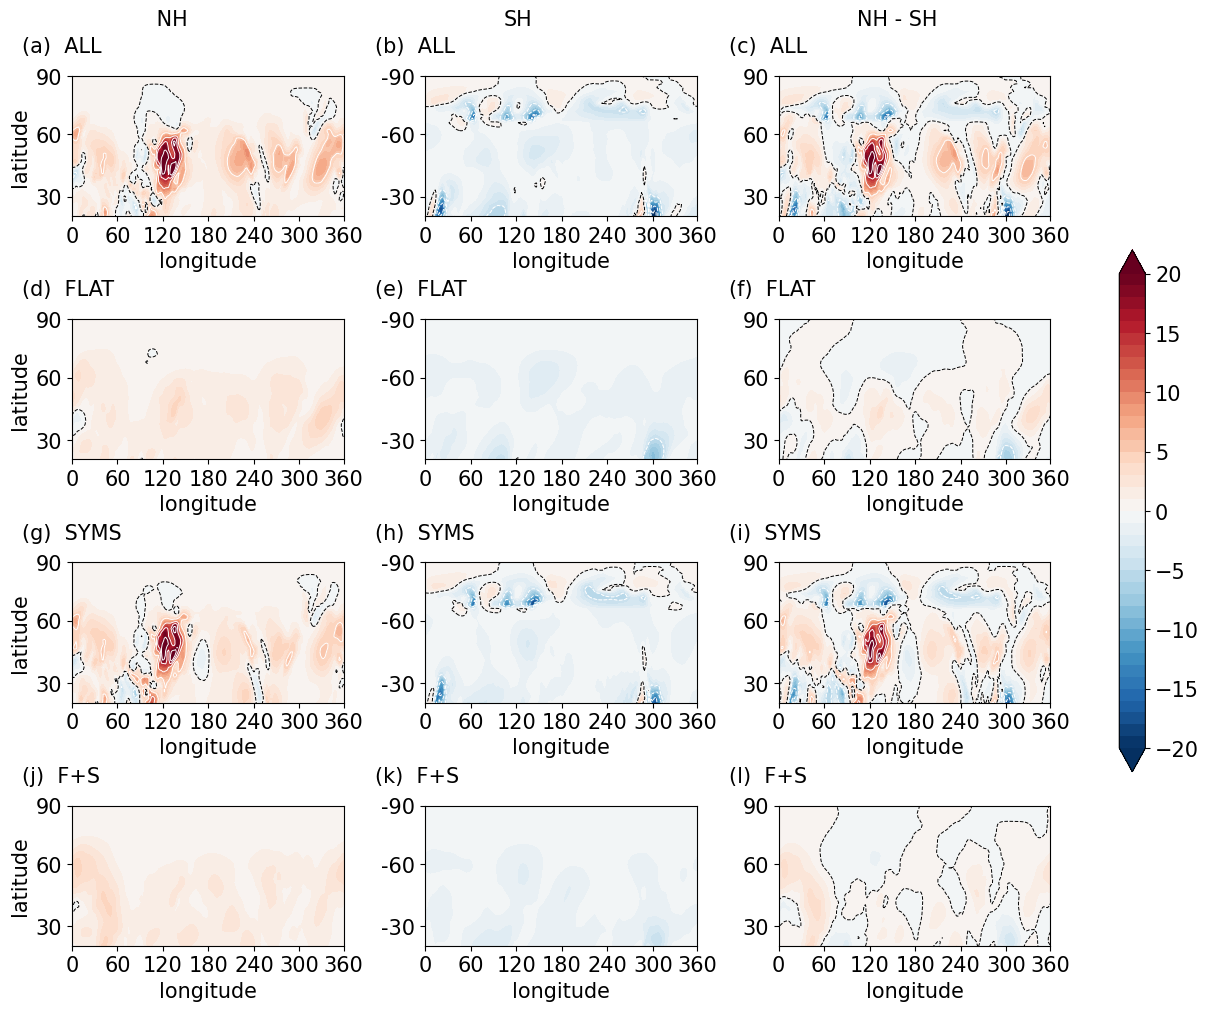

In [17]:
fig,ax = plot.subplots(4,3,figsize=(12,10),constrained_layout=True)#,projection=ccrs.PlateCarree())
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-20,21,1)
cll = np.arange(-20,25,5)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0,0].set_xticks(xxx)
ax[0,0].set_xticklabels(xx)
ax[0,0].set_yticks(yyy)
ax[0,0].set_yticklabels(yy)
ax[0,0].set_xlabel('longitude')
ax[0,0].set_ylabel('latitude')
ax[0,0].text(-35,53,'(a)  ALL')
ax[0,0].text(55,60,' NH')
ax[0,0].set_ylim(11,47)


p1=ax[0,0].contourf(x,y,vtre[0,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[0,0].contour(x,y,vtre[0,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p1=ax[0,0].contour(x,y,vtre[0,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[0,1].set_xticks(xxx)
ax[0,1].set_xticklabels(xx)
ax[0,1].set_yticks(yyy)
ax[0,1].set_yticklabels(yy)
ax[0,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[0,1].text(-35,53,'(b)  ALL')
ax[0,1].text(55,60,'SH')
ax[0,1].set_ylim(11,47)

p2=ax[0,1].contourf(x,y,vt[0,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[0,1].contour(x,y,vt[0,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[0,1].contour(x,y,vt[0,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[0,2].set_xticks(xxx)
ax[0,2].set_xticklabels(xx)
ax[0,2].set_yticks(yyy)
ax[0,2].set_yticklabels(yy)
ax[0,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[0,2].text(-35,53,'(c)  ALL')
ax[0,2].text(55,60,'NH - SH')
ax[0,2].set_ylim(11,47)

p2=ax[0,2].contourf(x,y,vt[0,48:96,:,2]+vtre[0,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
plot.colorbar(p2,ax=ax.ravel().tolist(),shrink=0.6)
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[0,2].contour(x,y,vt[0,48:96,:,2]+vtre[0,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[0,2].contour(x,y,vt[0,48:96,:,2]+vtre[0,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')




ax[1,0].set_xticks(xxx)
ax[1,0].set_xticklabels(xx)
ax[1,0].set_yticks(yyy)
ax[1,0].set_yticklabels(yy)
ax[1,0].set_xlabel('longitude')
ax[1,0].set_ylabel('latitude')
ax[1,0].text(-35,53,'(d)  FLAT')
ax[1,0].set_ylim(11,47)


p1=ax[1,0].contourf(x,y,vtre[1,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[1,0].contour(x,y,vtre[1,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p1=ax[1,0].contour(x,y,vtre[1,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[1,1].set_xticks(xxx)
ax[1,1].set_xticklabels(xx)
ax[1,1].set_yticks(yyy)
ax[1,1].set_yticklabels(yy)
ax[1,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[1,1].text(-35,53,'(e)  FLAT')
ax[1,1].set_ylim(11,47)

p2=ax[1,1].contourf(x,y,vt[1,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1,1].contour(x,y,vt[1,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[1,1].contour(x,y,vt[1,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[1,2].set_xticks(xxx)
ax[1,2].set_xticklabels(xx)
ax[1,2].set_yticks(yyy)
ax[1,2].set_yticklabels(yy)
ax[1,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[1,2].text(-35,53,'(f)  FLAT')
ax[1,2].set_ylim(11,47)

p2=ax[1,2].contourf(x,y,vt[1,48:96,:,2]+vtre[1,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1,2].contour(x,y,vt[1,48:96,:,2]+vtre[1,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[1,2].contour(x,y,vt[1,48:96,:,2]+vtre[1,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')





ax[2,0].set_xticks(xxx)
ax[2,0].set_xticklabels(xx)
ax[2,0].set_yticks(yyy)
ax[2,0].set_yticklabels(yy)
ax[2,0].set_xlabel('longitude')
ax[2,0].set_ylabel('latitude')
ax[2,0].text(-35,53,'(g)  SYMS')
ax[2,0].set_ylim(11,47)


p1=ax[2,0].contourf(x,y,vtre[2,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[2,0].contour(x,y,vtre[2,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p1=ax[2,0].contour(x,y,vtre[2,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[2,1].set_xticks(xxx)
ax[2,1].set_xticklabels(xx)
ax[2,1].set_yticks(yyy)
ax[2,1].set_yticklabels(yy)
ax[2,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[2,1].text(-35,53,'(h)  SYMS')
ax[2,1].set_ylim(11,47)

p2=ax[2,1].contourf(x,y,vt[2,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[2,1].contour(x,y,vt[2,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[2,1].contour(x,y,vt[2,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[2,2].set_xticks(xxx)
ax[2,2].set_xticklabels(xx)
ax[2,2].set_yticks(yyy)
ax[2,2].set_yticklabels(yy)
ax[2,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[2,2].text(-35,53,'(i)  SYMS')
ax[2,2].set_ylim(11,47)

p2=ax[2,2].contourf(x,y,vt[2,48:96,:,2]+vtre[2,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[2,2].contour(x,y,vt[2,48:96,:,2]+vtre[2,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[2,2].contour(x,y,vt[2,48:96,:,2]+vtre[2,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')





ax[3,0].set_xticks(xxx)
ax[3,0].set_xticklabels(xx)
ax[3,0].set_yticks(yyy)
ax[3,0].set_yticklabels(yy)
ax[3,0].set_xlabel('longitude')
ax[3,0].set_ylabel('latitude')
ax[3,0].text(-35,53,'(j)  F+S')
ax[3,0].set_ylim(11,47)


p1=ax[3,0].contourf(x,y,vtre[3,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[3,0].contour(x,y,vtre[3,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p1=ax[3,0].contour(x,y,vtre[3,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[3,1].set_xticks(xxx)
ax[3,1].set_xticklabels(xx)
ax[3,1].set_yticks(yyy)
ax[3,1].set_yticklabels(yy)
ax[3,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[3,1].text(-35,53,'(k)  F+S')
ax[3,1].set_ylim(11,47)

p2=ax[3,1].contourf(x,y,vt[3,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[3,1].contour(x,y,vt[3,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[3,1].contour(x,y,vt[3,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[3,2].set_xticks(xxx)
ax[3,2].set_xticklabels(xx)
ax[3,2].set_yticks(yyy)
ax[3,2].set_yticklabels(yy)
ax[3,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[3,2].text(-35,53,'(l)  F+S')
ax[3,2].set_ylim(11,47)

p2=ax[3,2].contourf(x,y,vt[3,48:96,:,2]+vtre[3,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[3,2].contour(x,y,vt[3,48:96,:,2]+vtre[3,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[3,2].contour(x,y,vt[3,48:96,:,2]+vtre[3,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')




plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/vt_v_MJ_m^2_ssw_ns_850.png',dpi=600,bbox_inches='tight') 


/tmp/ipykernel_15012/2557091096.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plot.cm.get_cmap('RdBu')


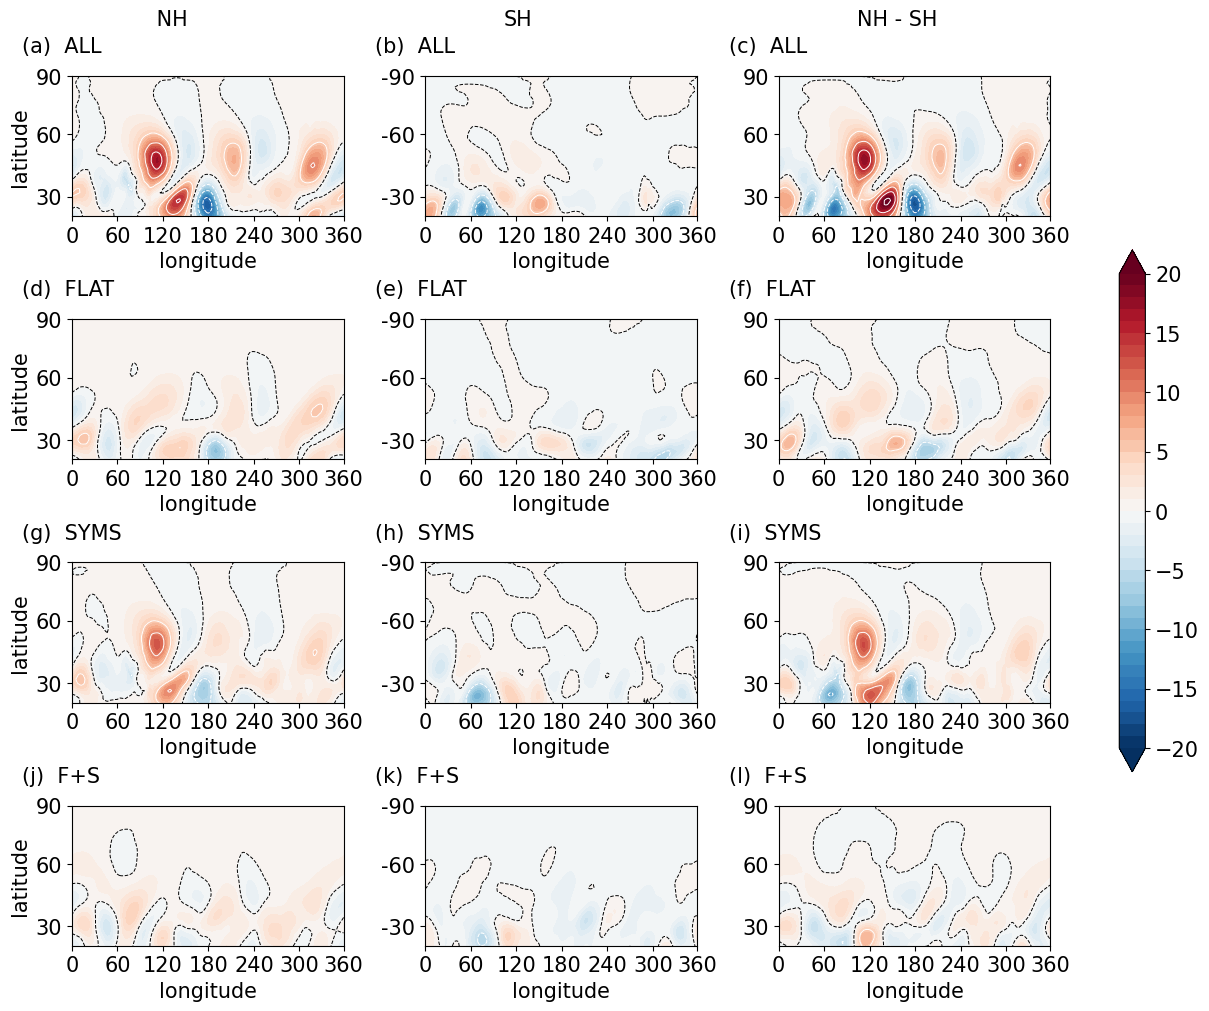

In [19]:
fig,ax = plot.subplots(4,3,figsize=(12,10),constrained_layout=True)#,projection=ccrs.PlateCarree())
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-20,21,1)
cll = np.arange(-20,25,5)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0,0].set_xticks(xxx)
ax[0,0].set_xticklabels(xx)
ax[0,0].set_yticks(yyy)
ax[0,0].set_yticklabels(yy)
ax[0,0].set_xlabel('longitude')
ax[0,0].set_ylabel('latitude')
ax[0,0].text(-35,53,'(a)  ALL')
ax[0,0].text(55,60,' NH')
ax[0,0].set_ylim(11,47)


p1=ax[0,0].contourf(x,y,vtre[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[0,0].contour(x,y,vtre[0,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p1=ax[0,0].contour(x,y,vtre[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[0,1].set_xticks(xxx)
ax[0,1].set_xticklabels(xx)
ax[0,1].set_yticks(yyy)
ax[0,1].set_yticklabels(yy)
ax[0,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[0,1].text(-35,53,'(b)  ALL')
ax[0,1].text(55,60,'SH')
ax[0,1].set_ylim(11,47)

p2=ax[0,1].contourf(x,y,vt[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[0,1].contour(x,y,vt[0,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[0,1].contour(x,y,vt[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[0,2].set_xticks(xxx)
ax[0,2].set_xticklabels(xx)
ax[0,2].set_yticks(yyy)
ax[0,2].set_yticklabels(yy)
ax[0,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[0,2].text(-35,53,'(c)  ALL')
ax[0,2].text(55,60,'NH - SH')
ax[0,2].set_ylim(11,47)

p2=ax[0,2].contourf(x,y,vt[0,48:96,:,8]+vtre[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
plot.colorbar(p2,ax=ax.ravel().tolist(),shrink=0.6)
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[0,2].contour(x,y,vt[0,48:96,:,8]+vtre[0,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[0,2].contour(x,y,vt[0,48:96,:,8]+vtre[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')




ax[1,0].set_xticks(xxx)
ax[1,0].set_xticklabels(xx)
ax[1,0].set_yticks(yyy)
ax[1,0].set_yticklabels(yy)
ax[1,0].set_xlabel('longitude')
ax[1,0].set_ylabel('latitude')
ax[1,0].text(-35,53,'(d)  FLAT')
ax[1,0].set_ylim(11,47)


p1=ax[1,0].contourf(x,y,vtre[1,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[1,0].contour(x,y,vtre[1,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p1=ax[1,0].contour(x,y,vtre[1,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[1,1].set_xticks(xxx)
ax[1,1].set_xticklabels(xx)
ax[1,1].set_yticks(yyy)
ax[1,1].set_yticklabels(yy)
ax[1,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[1,1].text(-35,53,'(e)  FLAT')
ax[1,1].set_ylim(11,47)

p2=ax[1,1].contourf(x,y,vt[1,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1,1].contour(x,y,vt[1,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[1,1].contour(x,y,vt[1,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[1,2].set_xticks(xxx)
ax[1,2].set_xticklabels(xx)
ax[1,2].set_yticks(yyy)
ax[1,2].set_yticklabels(yy)
ax[1,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[1,2].text(-35,53,'(f)  FLAT')
ax[1,2].set_ylim(11,47)

p2=ax[1,2].contourf(x,y,vt[1,48:96,:,8]+vtre[1,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1,2].contour(x,y,vt[1,48:96,:,8]+vtre[1,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[1,2].contour(x,y,vt[1,48:96,:,8]+vtre[1,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')





ax[2,0].set_xticks(xxx)
ax[2,0].set_xticklabels(xx)
ax[2,0].set_yticks(yyy)
ax[2,0].set_yticklabels(yy)
ax[2,0].set_xlabel('longitude')
ax[2,0].set_ylabel('latitude')
ax[2,0].text(-35,53,'(g)  SYMS')
ax[2,0].set_ylim(11,47)


p1=ax[2,0].contourf(x,y,vtre[2,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[2,0].contour(x,y,vtre[2,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p1=ax[2,0].contour(x,y,vtre[2,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[2,1].set_xticks(xxx)
ax[2,1].set_xticklabels(xx)
ax[2,1].set_yticks(yyy)
ax[2,1].set_yticklabels(yy)
ax[2,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[2,1].text(-35,53,'(h)  SYMS')
ax[2,1].set_ylim(11,47)

p2=ax[2,1].contourf(x,y,vt[2,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[2,1].contour(x,y,vt[2,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[2,1].contour(x,y,vt[2,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[2,2].set_xticks(xxx)
ax[2,2].set_xticklabels(xx)
ax[2,2].set_yticks(yyy)
ax[2,2].set_yticklabels(yy)
ax[2,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[2,2].text(-35,53,'(i)  SYMS')
ax[2,2].set_ylim(11,47)

p2=ax[2,2].contourf(x,y,vt[2,48:96,:,8]+vtre[2,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[2,2].contour(x,y,vt[2,48:96,:,8]+vtre[2,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[2,2].contour(x,y,vt[2,48:96,:,8]+vtre[2,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')





ax[3,0].set_xticks(xxx)
ax[3,0].set_xticklabels(xx)
ax[3,0].set_yticks(yyy)
ax[3,0].set_yticklabels(yy)
ax[3,0].set_xlabel('longitude')
ax[3,0].set_ylabel('latitude')
ax[3,0].text(-35,53,'(j)  F+S')
ax[3,0].set_ylim(11,47)


p1=ax[3,0].contourf(x,y,vtre[3,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[3,0].contour(x,y,vtre[3,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p1=ax[3,0].contour(x,y,vtre[3,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[3,1].set_xticks(xxx)
ax[3,1].set_xticklabels(xx)
ax[3,1].set_yticks(yyy)
ax[3,1].set_yticklabels(yy)
ax[3,1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[3,1].text(-35,53,'(k)  F+S')
ax[3,1].set_ylim(11,47)

p2=ax[3,1].contourf(x,y,vt[3,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[3,1].contour(x,y,vt[3,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[3,1].contour(x,y,vt[3,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[3,2].set_xticks(xxx)
ax[3,2].set_xticklabels(xx)
ax[3,2].set_yticks(yyy)
ax[3,2].set_yticklabels(yy)
ax[3,2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[3,2].text(-35,53,'(l)  F+S')
ax[3,2].set_ylim(11,47)

p2=ax[3,2].contourf(x,y,vt[3,48:96,:,8]+vtre[3,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[3,2].contour(x,y,vt[3,48:96,:,8]+vtre[3,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[3,2].contour(x,y,vt[3,48:96,:,8]+vtre[3,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')




plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/vt_v_MJ_m^2_ssw_ns_300.png',dpi=600,bbox_inches='tight') 


In [210]:
np.mean(np.mean(-tpl[3,59:96,0:191]+tplre[3,59:96,0:191],axis=0),axis=0)

-0.08634156695165329

In [214]:
np.mean(np.mean((tplre[0,59:96,0:191]),axis=0),axis=0)

-0.12383257156224198

/tmp/ipykernel_52847/4122139729.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plot.cm.get_cmap('RdBu')


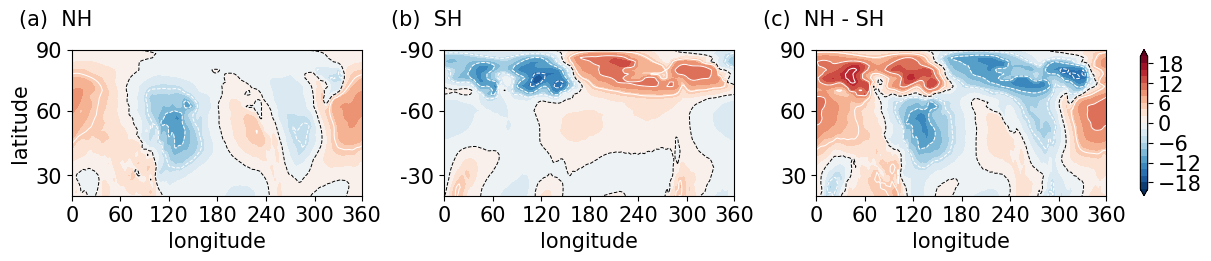

In [38]:
fig,ax = plot.subplots(1,3,figsize=(12,2.5),constrained_layout=True)#,projection=ccrs.PlateCarree())
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-20,22,2)
cll = np.arange(-20,25,5)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0].set_xticks(xxx)
ax[0].set_xticklabels(xx)
ax[0].set_yticks(yyy)
ax[0].set_yticklabels(yy)
ax[0].set_xlabel('longitude')
ax[0].set_ylabel('latitude')
ax[0].text(-35,53,'(a)  NH')
ax[0].set_ylim(11,47)



p1=ax[0].contourf(x,y,tplre[0,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,tplre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[0].contour(x,y,tplre[0,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p1=ax[0].contour(x,y,tplre[0,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[1].set_xticks(xxx)
ax[1].set_xticklabels(xx)
ax[1].set_yticks(yyy)
ax[1].set_yticklabels(yy)
ax[1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[1].text(-35,53,'(b)  SH')
ax[1].set_ylim(11,47)

p2=ax[1].contourf(x,y,tpl[0,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1].contour(x,y,tpl[0,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[1].contour(x,y,tpl[0,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[2].set_xticks(xxx)
ax[2].set_xticklabels(xx)
ax[2].set_yticks(yyy)
ax[2].set_yticklabels(yy)
ax[2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[2].text(-35,53,'(c)  NH - SH')
ax[2].set_ylim(11,47)

p2=ax[2].contourf(x,y,-tpl[0,48:96,:,2]+tplre[0,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-60,-30,0,30,60])
#cbar.ax.set_yticklabels(['-60','-30', '0','30', '60']) 
p2=ax[2].contour(x,y,-tpl[0,48:96,:,2]+tplre[0,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[2].contour(x,y,-tpl[0,48:96,:,2]+tplre[0,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/tpl_v_MJ_m^2_ssw_ns_850.png',dpi=600,bbox_inches='tight') 


/tmp/ipykernel_52847/3374655683.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plot.cm.get_cmap('RdBu')


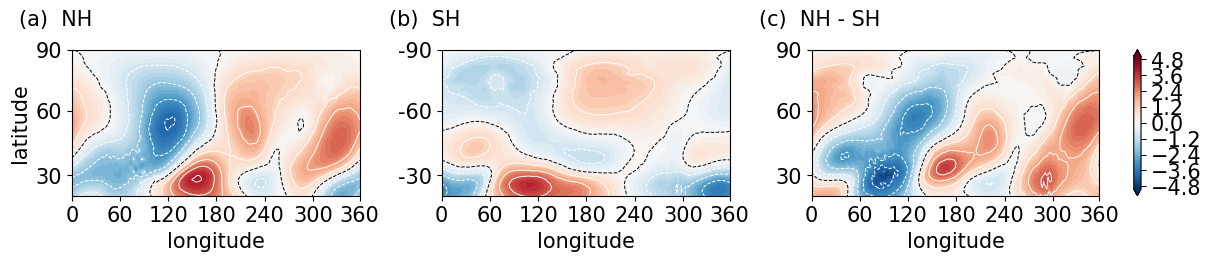

In [40]:
fig,ax = plot.subplots(1,3,figsize=(12,2.5),constrained_layout=True)#,projection=ccrs.PlateCarree())
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-5,5.2,0.2)
cll = np.arange(-5,6,1)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0].set_xticks(xxx)
ax[0].set_xticklabels(xx)
ax[0].set_yticks(yyy)
ax[0].set_yticklabels(yy)
ax[0].set_xlabel('longitude')
ax[0].set_ylabel('latitude')
ax[0].text(-35,53,'(a)  NH')
ax[0].set_ylim(11,47)



p1=ax[0].contourf(x,y,tplre[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,tplre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[0].contour(x,y,tplre[0,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p1=ax[0].contour(x,y,tplre[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[1].set_xticks(xxx)
ax[1].set_xticklabels(xx)
ax[1].set_yticks(yyy)
ax[1].set_yticklabels(yy)
ax[1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[1].text(-35,53,'(b)  SH')
ax[1].set_ylim(11,47)

p2=ax[1].contourf(x,y,tpl[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1].contour(x,y,tpl[0,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[1].contour(x,y,tpl[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[2].set_xticks(xxx)
ax[2].set_xticklabels(xx)
ax[2].set_yticks(yyy)
ax[2].set_yticklabels(yy)
ax[2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[2].text(-35,53,'(c)  NH - SH')
ax[2].set_ylim(11,47)

p2=ax[2].contourf(x,y,-tpl[0,48:96,:,8]+tplre[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-60,-30,0,30,60])
#cbar.ax.set_yticklabels(['-60','-30', '0','30', '60']) 
p2=ax[2].contour(x,y,-tpl[0,48:96,:,8]+tplre[0,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[2].contour(x,y,-tpl[0,48:96,:,8]+tplre[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/tpl_v_MJ_m^2_ssw_ns_300.png',dpi=600,bbox_inches='tight') 


/tmp/ipykernel_52847/329940516.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plot.cm.get_cmap('RdBu')


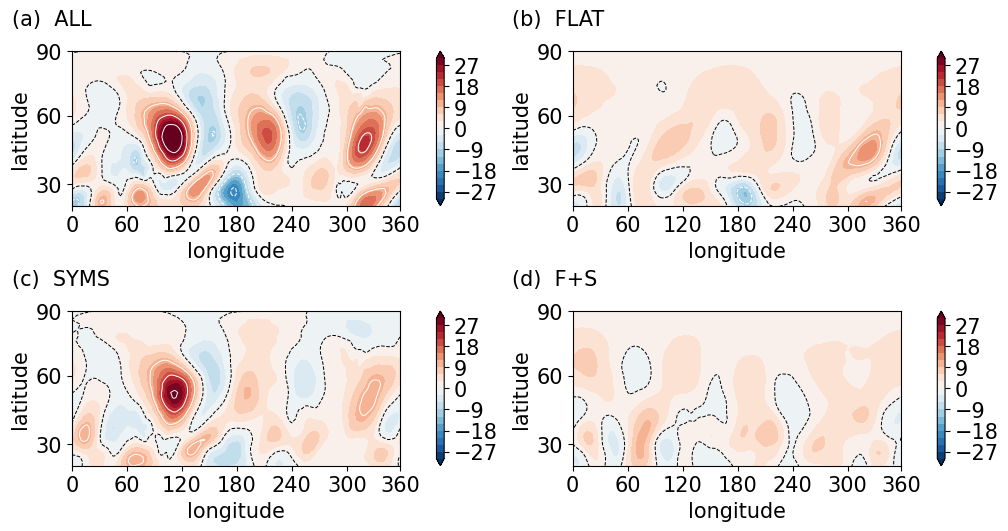

In [46]:
fig,ax = plot.subplots(2,2,figsize=(10,5.2),constrained_layout=True)
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-30,33,3)
cl1 = np.arange(-30,40,10)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0,0].set_xticks(xxx)
ax[0,0].set_xticklabels(xx)
ax[0,0].set_yticks(yyy)
ax[0,0].set_yticklabels(yy)
ax[0,0].set_xlabel('longitude')
ax[0,0].set_ylabel('latitude')
ax[0,0].text(-35,53,'(a)  ALL')
ax[0,0].set_ylim(11,47)

p1=ax[0,0].contourf(x,y,-vt[0,48:96,:,8]+vtre[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p1,ax=ax[0,0])#,ticks=[-60,-30,0,30,60])
#cbar.ax.set_yticklabels(['-60','-30', '0','30', '60']) 
p1=ax[0,0].contour(x,y,-vt[0,48:96,:,8]+vtre[0,48:96,:,8],levels=cl1,colors='white',linewidths=0.7)
p1=ax[0,0].contour(x,y,-vt[0,48:96,:,8]+vtre[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')



ax[0,1].set_xticks(xxx)
ax[0,1].set_xticklabels(xx)
ax[0,1].set_yticks(yyy)
ax[0,1].set_yticklabels(yy)
ax[0,1].set_xlabel('longitude')
ax[0,1].set_ylabel('latitude')
ax[0,1].text(-35,53,'(b)  FLAT')
ax[0,1].set_ylim(11,47)

p2=ax[0,1].contourf(x,y,-vt[1,48:96,:,8]+vtre[1,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p2,ax=ax[0,1])#,ticks=[-60,-30,0,30,60])
#cbar.ax.set_yticklabels(['-60','-30', '0','30', '60']) 
p2=ax[0,1].contour(x,y,-vt[1,48:96,:,8]+vtre[1,48:96,:,8],levels=cl1,colors='white',linewidths=0.7)
p2=ax[0,1].contour(x,y,-vt[1,48:96,:,8]+vtre[1,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')



ax[1,0].set_xticks(xxx)
ax[1,0].set_xticklabels(xx)
ax[1,0].set_yticks(yyy)
ax[1,0].set_yticklabels(yy)
ax[1,0].set_xlabel('longitude')
ax[1,0].set_ylabel('latitude')
ax[1,0].text(-35,53,'(c)  SYMS')
ax[1,0].set_ylim(11,47)

p3=ax[1,0].contourf(x,y,-vt[2,48:96,:,8]+vtre[2,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p3,ax=ax[1,0])#,ticks=[-60,-30,0,30,60])
#cbar.ax.set_yticklabels(['-60','-30', '0','30', '60']) 
p3=ax[1,0].contour(x,y,-vt[2,48:96,:,8]+vtre[2,48:96,:,8],levels=cl1,colors='white',linewidths=0.7)
p3=ax[1,0].contour(x,y,-vt[2,48:96,:,8]+vtre[2,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')



ax[1,1].set_xticks(xxx)
ax[1,1].set_xticklabels(xx)
ax[1,1].set_yticks(yyy)
ax[1,1].set_yticklabels(yy)
ax[1,1].set_xlabel('longitude')
ax[1,1].set_ylabel('latitude')
ax[1,1].text(-35,53,'(d)  F+S')
ax[1,1].set_ylim(11,47)

p4=ax[1,1].contourf(x,y,-vt[3,48:96,:,8]+vtre[3,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p4,ax=ax[1,1])#,ticks=[-60,-30,0,30,60])
#cbar.ax.set_yticklabels(['-60','-30', '0','30', '60']) 
p4=ax[1,1].contour(x,y,-vt[3,48:96,:,8]+vtre[3,48:96,:,8],levels=cl1,colors='white',linewidths=0.7)
p4=ax[1,1].contour(x,y,-vt[3,48:96,:,8]+vtre[3,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


barplot=np.zeros((4))
barplot[0] = (-np.mean(np.mean(vt[0,59:96,0:191,8],axis=0),axis=0)+np.mean(np.mean((vtre[0,59:96,0:191,8]),axis=0),axis=0))/np.mean(np.mean((vtre[0,59:96,0:191,8]),axis=0),axis=0)*100
barplot[1] = (-np.mean(np.mean(vt[1,59:96,0:191,8],axis=0),axis=0)+np.mean(np.mean((vtre[1,59:96,0:191,8]),axis=0),axis=0))/np.mean(np.mean((vtre[1,59:96,0:191,8]),axis=0),axis=0)*100
barplot[2] = (-np.mean(np.mean(vt[2,59:96,0:191,8],axis=0),axis=0)+np.mean(np.mean((vtre[2,59:96,0:191,8]),axis=0),axis=0))/np.mean(np.mean((vtre[2,59:96,0:191,8]),axis=0),axis=0)*100
barplot[3] = (-np.mean(np.mean(vt[3,59:96,0:191,8],axis=0),axis=0)+np.mean(np.mean((vtre[3,59:96,0:191,8]),axis=0),axis=0))/np.mean(np.mean((vtre[3,59:96,0:191,8]),axis=0),axis=0)*100



# name_list = ['ALL','FLAT','SYMS','F+S']
# ax[2,0].bar(range(len(barplot)),barplot,tick_label = name_list)
# ax[2,0].set_xlim(-1,4)
# ax[2,0].set_ylim(-80,80)
# ax[2,0].set_yticks([-20,-10,0,10,20,30,40])
# ax[2,0].set_yticklabels([-20,-10,0,10,20,30,40])
# ax[2,0].set_ylabel('Percent') 
# ax[2,0].text(-1.9,45,'(e)')
# ax[2,0].axhline(y=0,color='black',linewidth='1')

# ax[2,1].axis('off')

plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/vt_v_MJ_m^2_ssw_300.png',dpi=600,bbox_inches='tight') 



/tmp/ipykernel_52847/1655398053.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plot.cm.get_cmap('RdBu')


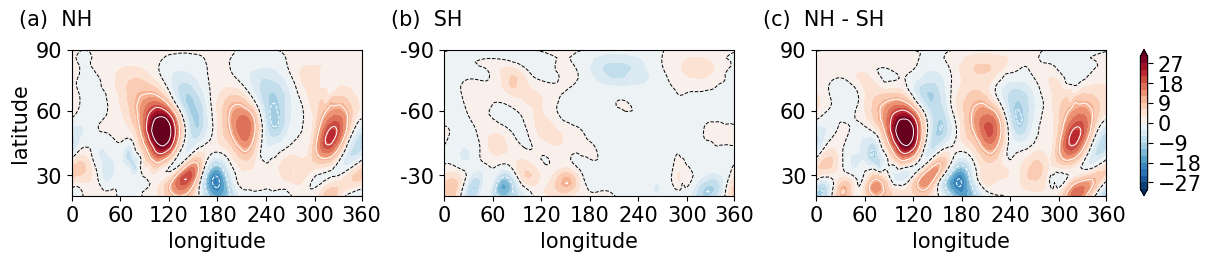

In [51]:
fig,ax = plot.subplots(1,3,figsize=(12,2.5),constrained_layout=True)#,projection=ccrs.PlateCarree())
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-30,33,3)
cll = np.arange(-30,40,10)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0].set_xticks(xxx)
ax[0].set_xticklabels(xx)
ax[0].set_yticks(yyy)
ax[0].set_yticklabels(yy)
ax[0].set_xlabel('longitude')
ax[0].set_ylabel('latitude')
ax[0].text(-35,53,'(a)  NH')
ax[0].set_ylim(11,47)



p1=ax[0].contourf(x,y,vtre[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[0].contour(x,y,vtre[0,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p1=ax[0].contour(x,y,vtre[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[1].set_xticks(xxx)
ax[1].set_xticklabels(xx)
ax[1].set_yticks(yyy)
ax[1].set_yticklabels(yy)
ax[1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[1].text(-35,53,'(b)  SH')
ax[1].set_ylim(11,47)

p2=ax[1].contourf(x,y,vt[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1].contour(x,y,vt[0,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[1].contour(x,y,vt[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[2].set_xticks(xxx)
ax[2].set_xticklabels(xx)
ax[2].set_yticks(yyy)
ax[2].set_yticklabels(yy)
ax[2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[2].text(-35,53,'(c)  NH - SH')
ax[2].set_ylim(11,47)

p2=ax[2].contourf(x,y,-vt[0,48:96,:,8]+vtre[0,48:96,:,8],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-60,-30,0,30,60])
#cbar.ax.set_yticklabels(['-60','-30', '0','30', '60']) 
p2=ax[2].contour(x,y,-vt[0,48:96,:,8]+vtre[0,48:96,:,8],levels=cll,colors='white',linewidths=0.7)
p2=ax[2].contour(x,y,-vt[0,48:96,:,8]+vtre[0,48:96,:,8],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/vt_v_MJ_m^2_ssw_ns_300.png',dpi=600,bbox_inches='tight') 


/tmp/ipykernel_52847/4055368371.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plot.cm.get_cmap('RdBu')


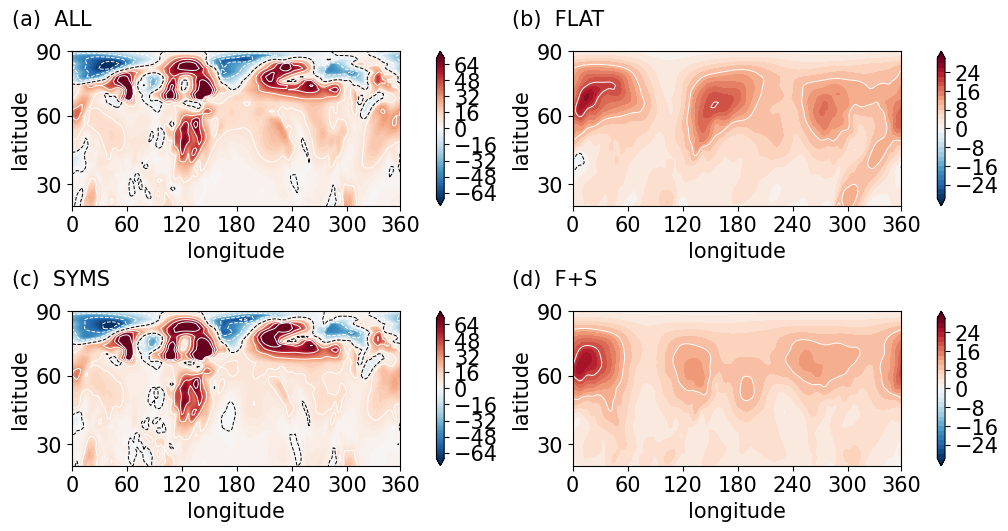

In [57]:
fig,ax = plot.subplots(2,2,figsize=(10,5.2),constrained_layout=True)
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-70,72,2)
cl1 = np.arange(-70,75,20)

cl2 = np.arange(-30,32,2)
cl12 = np.arange(-30,35,10)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0,0].set_xticks(xxx)
ax[0,0].set_xticklabels(xx)
ax[0,0].set_yticks(yyy)
ax[0,0].set_yticklabels(yy)
ax[0,0].set_xlabel('longitude')
ax[0,0].set_ylabel('latitude')
ax[0,0].text(-35,53,'(a)  ALL')
ax[0,0].set_ylim(11,47)

p1=ax[0,0].contourf(x,y,-vt[0,48:96,:,2]+vtre[0,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p1,ax=ax[0,0])#,ticks=[-60,-30,0,30,60])
#cbar.ax.set_yticklabels(['-60','-30', '0','30', '60']) 
p1=ax[0,0].contour(x,y,-vt[0,48:96,:,2]+vtre[0,48:96,:,2],levels=cl1,colors='white',linewidths=0.7)
p1=ax[0,0].contour(x,y,-vt[0,48:96,:,2]+vtre[0,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')



ax[0,1].set_xticks(xxx)
ax[0,1].set_xticklabels(xx)
ax[0,1].set_yticks(yyy)
ax[0,1].set_yticklabels(yy)
ax[0,1].set_xlabel('longitude')
ax[0,1].set_ylabel('latitude')
ax[0,1].text(-35,53,'(b)  FLAT')
ax[0,1].set_ylim(11,47)

p2=ax[0,1].contourf(x,y,-vt[1,48:96,:,2]+vtre[1,48:96,:,2],cmap=reversed_map,levels=cl2,extend='both')
cbar=plot.colorbar(p2,ax=ax[0,1])#,ticks=[-60,-30,0,30,60])
#cbar.ax.set_yticklabels(['-60','-30', '0','30', '60']) 
p2=ax[0,1].contour(x,y,-vt[1,48:96,:,2]+vtre[1,48:96,:,2],levels=cl12,colors='white',linewidths=0.7)
p2=ax[0,1].contour(x,y,-vt[1,48:96,:,2]+vtre[1,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')



ax[1,0].set_xticks(xxx)
ax[1,0].set_xticklabels(xx)
ax[1,0].set_yticks(yyy)
ax[1,0].set_yticklabels(yy)
ax[1,0].set_xlabel('longitude')
ax[1,0].set_ylabel('latitude')
ax[1,0].text(-35,53,'(c)  SYMS')
ax[1,0].set_ylim(11,47)

p3=ax[1,0].contourf(x,y,-vt[2,48:96,:,2]+vtre[2,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p3,ax=ax[1,0])#,ticks=[-60,-30,0,30,60])
#cbar.ax.set_yticklabels(['-60','-30', '0','30', '60']) 
p3=ax[1,0].contour(x,y,-vt[2,48:96,:,2]+vtre[2,48:96,:,2],levels=cl1,colors='white',linewidths=0.7)
p3=ax[1,0].contour(x,y,-vt[2,48:96,:,2]+vtre[2,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')



ax[1,1].set_xticks(xxx)
ax[1,1].set_xticklabels(xx)
ax[1,1].set_yticks(yyy)
ax[1,1].set_yticklabels(yy)
ax[1,1].set_xlabel('longitude')
ax[1,1].set_ylabel('latitude')
ax[1,1].text(-35,53,'(d)  F+S')
ax[1,1].set_ylim(11,47)

p4=ax[1,1].contourf(x,y,-vt[3,48:96,:,2]+vtre[3,48:96,:,2],cmap=reversed_map,levels=cl2,extend='both')
cbar=plot.colorbar(p4,ax=ax[1,1])#,ticks=[-60,-30,0,30,60])
#cbar.ax.set_yticklabels(['-60','-30', '0','30', '60']) 
p4=ax[1,1].contour(x,y,-vt[3,48:96,:,2]+vtre[3,48:96,:,2],levels=cl12,colors='white',linewidths=0.7)
p4=ax[1,1].contour(x,y,-vt[3,48:96,:,2]+vtre[3,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


barplot=np.zeros((4))
barplot[0] = (-np.mean(np.mean(vt[0,59:96,0:191,2],axis=0),axis=0)+np.mean(np.mean((vtre[0,59:96,0:191,2]),axis=0),axis=0))/np.mean(np.mean((vtre[0,59:96,0:191,2]),axis=0),axis=0)*100
barplot[1] = (-np.mean(np.mean(vt[1,59:96,0:191,2],axis=0),axis=0)+np.mean(np.mean((vtre[1,59:96,0:191,2]),axis=0),axis=0))/np.mean(np.mean((vtre[1,59:96,0:191,2]),axis=0),axis=0)*100
barplot[2] = (-np.mean(np.mean(vt[2,59:96,0:191,2],axis=0),axis=0)+np.mean(np.mean((vtre[2,59:96,0:191,2]),axis=0),axis=0))/np.mean(np.mean((vtre[2,59:96,0:191,2]),axis=0),axis=0)*100
barplot[3] = (-np.mean(np.mean(vt[3,59:96,0:191,2],axis=0),axis=0)+np.mean(np.mean((vtre[3,59:96,0:191,2]),axis=0),axis=0))/np.mean(np.mean((vtre[3,59:96,0:191,2]),axis=0),axis=0)*100



# name_list = ['ALL','FLAT','SYMS','F+S']
# ax[2,0].bar(range(len(barplot)),barplot,tick_label = name_list)
# ax[2,0].set_xlim(-1,4)
# ax[2,0].set_ylim(-80,80)
# ax[2,0].set_yticks([-20,-10,0,10,20,30,40])
# ax[2,0].set_yticklabels([-20,-10,0,10,20,30,40])
# ax[2,0].set_ylabel('Percent') 
# ax[2,0].text(-1.9,45,'(e)')
# ax[2,0].axhline(y=0,color='black',linewidth='1')

# ax[2,1].axis('off')

plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/vt_v_MJ_m^2_ssw_850.png',dpi=600,bbox_inches='tight') 




/tmp/ipykernel_52847/2327212175.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plot.cm.get_cmap('RdBu')


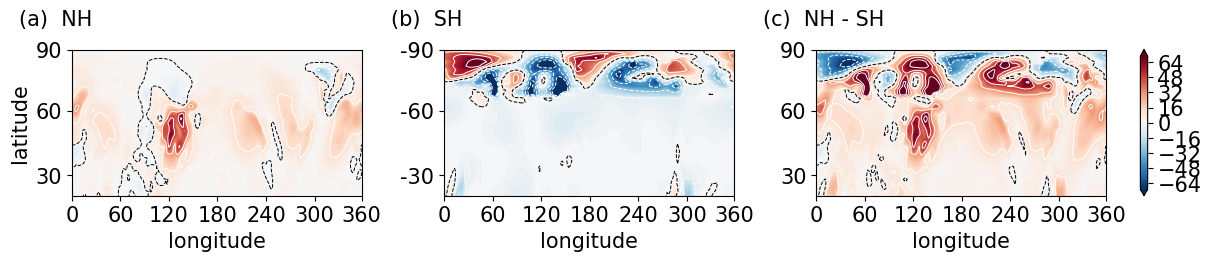

In [58]:
fig,ax = plot.subplots(1,3,figsize=(12,2.5),constrained_layout=True)#,projection=ccrs.PlateCarree())
plot.rcParams['font.size'] = '15'

x = np.arange(0,192,1)
y = np.arange(0,48,1)

orig_map=plot.cm.get_cmap('RdBu')
reversed_map = orig_map.reversed()

cl = np.arange(-70,72,2)
cll = np.arange(-70,75,20)

xx = [0,60,120,180,240,300,360]
xxx = [0,32,64,96,128,160,191]
yy = [0,30,60,90]
yyy = [0,16,32,47]

ax[0].set_xticks(xxx)
ax[0].set_xticklabels(xx)
ax[0].set_yticks(yyy)
ax[0].set_yticklabels(yy)
ax[0].set_xlabel('longitude')
ax[0].set_ylabel('latitude')
ax[0].text(-35,53,'(a)  NH')
ax[0].set_ylim(11,47)



p1=ax[0].contourf(x,y,vtre[0,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#p1=ax[0].contourf(x,y,vtre[0,48:96,:],cmap=reversed_map)
#cbar=plot.colorbar(p1,ax=ax[0],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p1=ax[0].contour(x,y,vtre[0,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p1=ax[0].contour(x,y,vtre[0,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')


yy = [0,-30,-60,-90]

ax[1].set_xticks(xxx)
ax[1].set_xticklabels(xx)
ax[1].set_yticks(yyy)
ax[1].set_yticklabels(yy)
ax[1].set_xlabel('longitude')
#ax[1].set_ylabel('latitude')
ax[1].text(-35,53,'(b)  SH')
ax[1].set_ylim(11,47)

p2=ax[1].contourf(x,y,vt[0,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
#cbar=plot.colorbar(p2,ax=ax[1],ticks=[-1e6,0,1e6])
#cbar.ax.set_yticklabels(['-1e6', '0', '1e6']) 
p2=ax[1].contour(x,y,vt[0,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[1].contour(x,y,vt[0,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

yy = [0,30,60,90]

ax[2].set_xticks(xxx)
ax[2].set_xticklabels(xx)
ax[2].set_yticks(yyy)
ax[2].set_yticklabels(yy)
ax[2].set_xlabel('longitude')
#ax[2].set_ylabel('latitude')
ax[2].text(-35,53,'(c)  NH - SH')
ax[2].set_ylim(11,47)

p2=ax[2].contourf(x,y,-vt[0,48:96,:,2]+vtre[0,48:96,:,2],cmap=reversed_map,levels=cl,extend='both')
cbar=plot.colorbar(p2,ax=ax[2])#,ticks=[-60,-30,0,30,60])
#cbar.ax.set_yticklabels(['-60','-30', '0','30', '60']) 
p2=ax[2].contour(x,y,-vt[0,48:96,:,2]+vtre[0,48:96,:,2],levels=cll,colors='white',linewidths=0.7)
p2=ax[2].contour(x,y,-vt[0,48:96,:,2]+vtre[0,48:96,:,2],levels=[0],colors='black',linewidths=0.7,linestyles='dashed')

plot.savefig('/home/smliu01/scratch-midway2/ssw/plot/vt_v_MJ_m^2_ssw_ns_850.png',dpi=600,bbox_inches='tight') 
